# Regression on an Insurance Dataset (S4 EP12)
* **Goal:** For each id row in the test set, you must predict the continuous target Premium Amount.
* **Evaluation metric:** Root Mean Squared Logarithmic Error (RMSLE).

In [30]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# df_train_original = pd.read_csv('Insurance Premium Prediction Dataset.csv')
df_train

id   Age  Gender  Annual Income Marital Status  \
0              0  19.0  Female        10049.0        Married   
1              1  39.0  Female        31678.0       Divorced   
2              2  23.0    Male        25602.0       Divorced   
3              3  21.0    Male       141855.0        Married   
4              4  21.0    Male        39651.0         Single   
...          ...   ...     ...            ...            ...   
1199995  1199995  36.0  Female        27316.0        Married   
1199996  1199996  54.0    Male        35786.0       Divorced   
1199997  1199997  19.0    Male        51884.0       Divorced   
1199998  1199998  55.0    Male            NaN         Single   
1199999  1199999  21.0  Female            NaN       Divorced   

         Number of Dependents Education Level     Occupation  Health Score  \
0                         1.0      Bachelor's  Self-Employed     22.598761   
1                         3.0        Master's            NaN     15.569731   
2                         3.0     High School  Self-Employed     47.177549   
3                         2.0      Bachelor's            NaN     10.938144   
4                         1.0      Bachelor's  Self-Employed     20.376094   
...                       ...             ...            ...           ...   
1199995                   0.0        Master's     Unemployed     13.772907   
1199996                   NaN        Master's  Self-Employed     11.483482   
1199997                   0.0        Master's            NaN     14.724469   
1199998                   1.0             PhD            NaN     18.547381   
1199999                   0.0             PhD            NaN     10.125323   

         Location  ... Previous Claims  Vehicle Age  Credit Score  \
0           Urban  ...             2.0         17.0         372.0   
1           Rural  ...             1.0         12.0         694.0   
2        Suburban  ...             1.0         14.0           NaN   
3           Rural  ...             1.0          0.0         367.0   
4           Rural  ...             0.0          8.0         598.0   
...           ...  ...             ...          ...           ...   
1199995     Urban  ...             NaN          5.0         372.0   
1199996     Rural  ...             NaN         10.0         597.0   
1199997  Suburban  ...             0.0         19.0           NaN   
1199998  Suburban  ...             1.0          7.0         407.0   
1199999     Rural  ...             0.0         18.0         502.0   

         Insurance Duration           Policy Start Date Customer Feedback  \
0                       5.0  2023-12-23 15:21:39.134960              Poor   
1                       2.0  2023-06-12 15:21:39.111551           Average   
2                       3.0  2023-09-30 15:21:39.221386              Good   
3                       1.0  2024-06-12 15:21:39.226954              Poor   
4                       4.0  2021-12-01 15:21:39.252145              Poor   
...                     ...                         ...               ...   
1199995                 3.0  2023-05-03 15:21:39.257696              Poor   
1199996                 4.0  2022-09-10 15:21:39.134960              Poor   
1199997                 6.0  2021-05-25 15:21:39.106582              Good   
1199998                 4.0  2021-09-19 15:21:39.190215              Poor   
1199999                 6.0  2020-08-26 15:21:39.155231              Good   

        Smoking Status Exercise Frequency Property Type Premium Amount  
0                   No             Weekly         House         2869.0  
1                  Yes            Monthly         House         1483.0  
2                  Yes             Weekly         House          567.0  
3                  Yes              Daily     Apartment          765.0  
4                  Yes             Weekly         House         2022.0  
...                ...                ...           ...            ...  
1199995             No              Daily  

# Exploratory Data Analysis (EDA)

In [3]:
print(df_train.info(), '\n')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [11]:
df_train.describe()

id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.000000e+00  3.000000e+02   
25%    1.591896e+01         0.000000  5.000000e+00  4.680000e+02   
50%    2.457865e+01         1.000000  1.000000e+01  5.950000e+02   
75%    3.452721e+01         2.000000  1.500000e+01  7.210000e+02   
max    5.897591e+01         9.000000  1.900000e+01  8.490000e+02   

       Insurance Duration  Premium Amount  
count        1.199999e+06    1.200000e+06  
mean         5.018219e+00    1.102545e+03  
std          2.594331e+00    8.649989e+02  
min          1.000000e+00    2.000000e+01  
25%          3.000000e+00    5.140000e+02  
50%          5.000000e+00    8.720000e+02  
75%          7.000000e+00    1.509000e+03  
max          9.000000e+00    4.999000e+03

In [12]:
df_test.describe()

id            Age  Annual Income  Number of Dependents  \
count  8.000000e+05  787511.000000  770140.000000         726870.000000   
mean   1.600000e+06      41.136440   32803.871471              2.009337   
std    2.309403e+05      13.537829   32201.063749              1.415241   
min    1.200000e+06      18.000000       2.000000              0.000000   
25%    1.400000e+06      30.000000    8048.000000              1.000000   
50%    1.600000e+06      41.000000   23981.000000              2.000000   
75%    1.799999e+06      53.000000   44660.000000              3.000000   
max    1.999999e+06      64.000000  149997.000000              4.000000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  750551.000000    557198.000000  799997.000000  708549.000000   
mean       25.613036         1.004873       9.571891     592.904749   
std        12.206882         0.982803       5.772200     150.116374   
min         1.646561         0.000000       0.000000     300.000000   
25%        15.917353         0.000000       5.000000     468.000000   
50%        24.580164         1.000000      10.000000     595.000000   
75%        34.517766         2.000000      15.000000     721.000000   
max        57.957351         9.000000      19.000000     849.000000   

       Insurance Duration  
count       799998.000000  
mean             5.018949  
std              2.593759  
min              1.000000  
25%              3.000000  
50%              5.000000  
75%              7.000000  
max              9.000000

In [14]:
print(df_train.isna().sum(), '\n')
print(df_test.isna().sum())

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64 

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type             

In [17]:
# Select categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
numerical_columns = df_train.select_dtypes(exclude=['object']).columns

# Define the target column
target_column = 'Premium Amount'

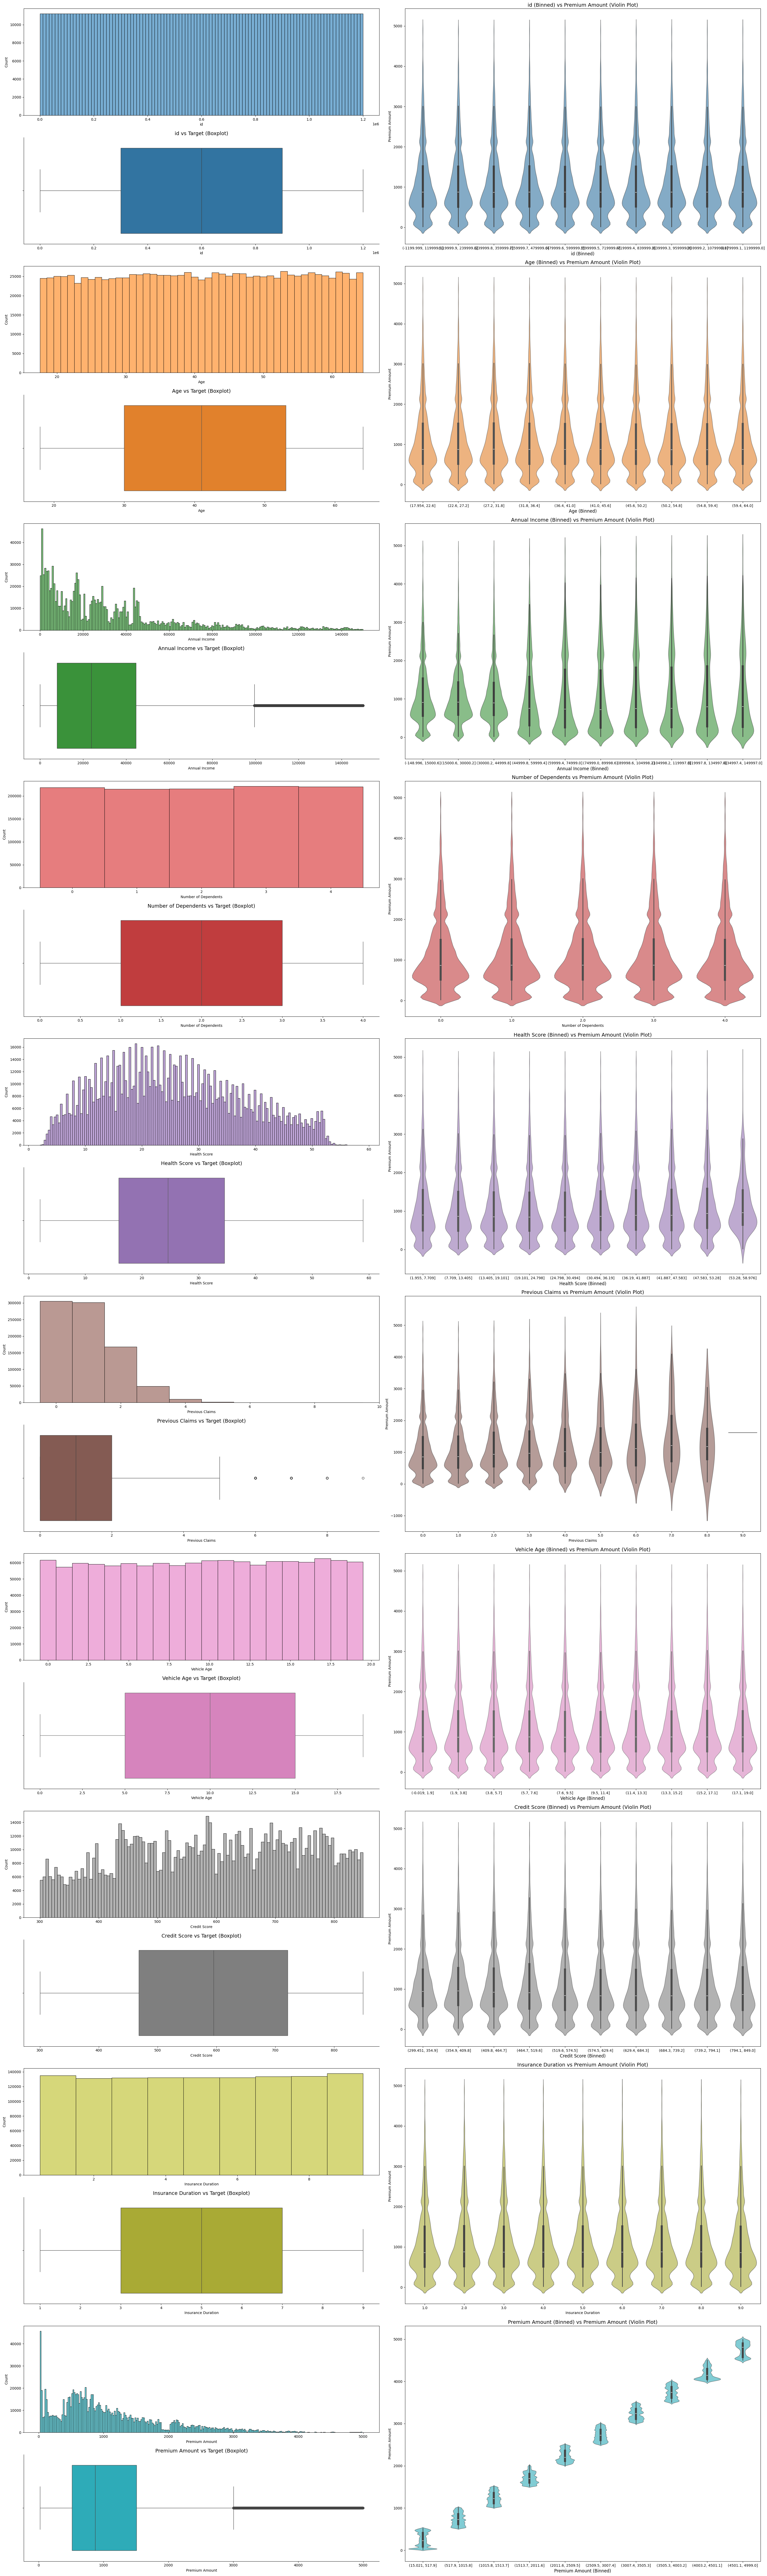

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Numerical columns

# Create a color palette for the columns
palette = sns.color_palette('tab10', len(numerical_columns))
color_dict = dict(zip(numerical_columns, palette))

# Create a grid of subplots for histograms, boxplots, and scatterplots/violin plots
fig = plt.figure(figsize=(30, 10 * len(numerical_columns)))
gs = gridspec.GridSpec(2 * len(numerical_columns), 2, figure=fig)

df_binned = df_train.copy()

for i, column in enumerate(numerical_columns):

    if df_train[column].nunique() > 50: discrete = False
    else : discrete = True

    # Plot histogram with a unique color
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=df_train, x=column, fill=True, common_norm=False, alpha=0.6,
        linewidth=0.8, color=color_dict[column], ax=ax_hist,  discrete = discrete
    )

    # Plot boxplot with the same unique color
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(data=df_train, x=column, ax=ax_box, color=color_dict[column])
    ax_box.set_title(f'{column} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional plot: violin plot or barplot based on unique values, fallback to scatterplot
    ax_conditional = fig.add_subplot(gs[2 * i:2 * i + 2, 1])  # Merges 2 rows
    if df_train[column].nunique() <= 10:
        # If the column has 10 or fewer unique values, use a violin plot
        sns.violinplot(data=df_train, x=column, y=target_column, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} vs {target_column} (Violin Plot)', fontsize=14)
    else:
        # Bin the column into 10 intervals, but keep original target column values
        df_binned['Binned Column'] = pd.cut(df_train[column], bins=10)
        sns.violinplot(data=df_binned, x='Binned Column', y=target_column, ax=ax_conditional, color=color_dict[column], alpha=0.6)
        ax_conditional.set_title(f'{column} (Binned) vs {target_column} (Violin Plot)', fontsize=14)
        ax_conditional.set_xlabel(f'{column} (Binned)', fontsize=12)

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

<ipython-input-19-834edd78d357>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, ax=axes[i, 0], palette='tab10')
<ipython-input-19-834edd78d357>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x=column, y=target_column, ax=axes[i, 1], palette='tab10')
<ipython-input-19-834edd78d357>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=column, ax=axes[i, 0], palette='tab10')
<ipython-input-19-834edd78d357>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

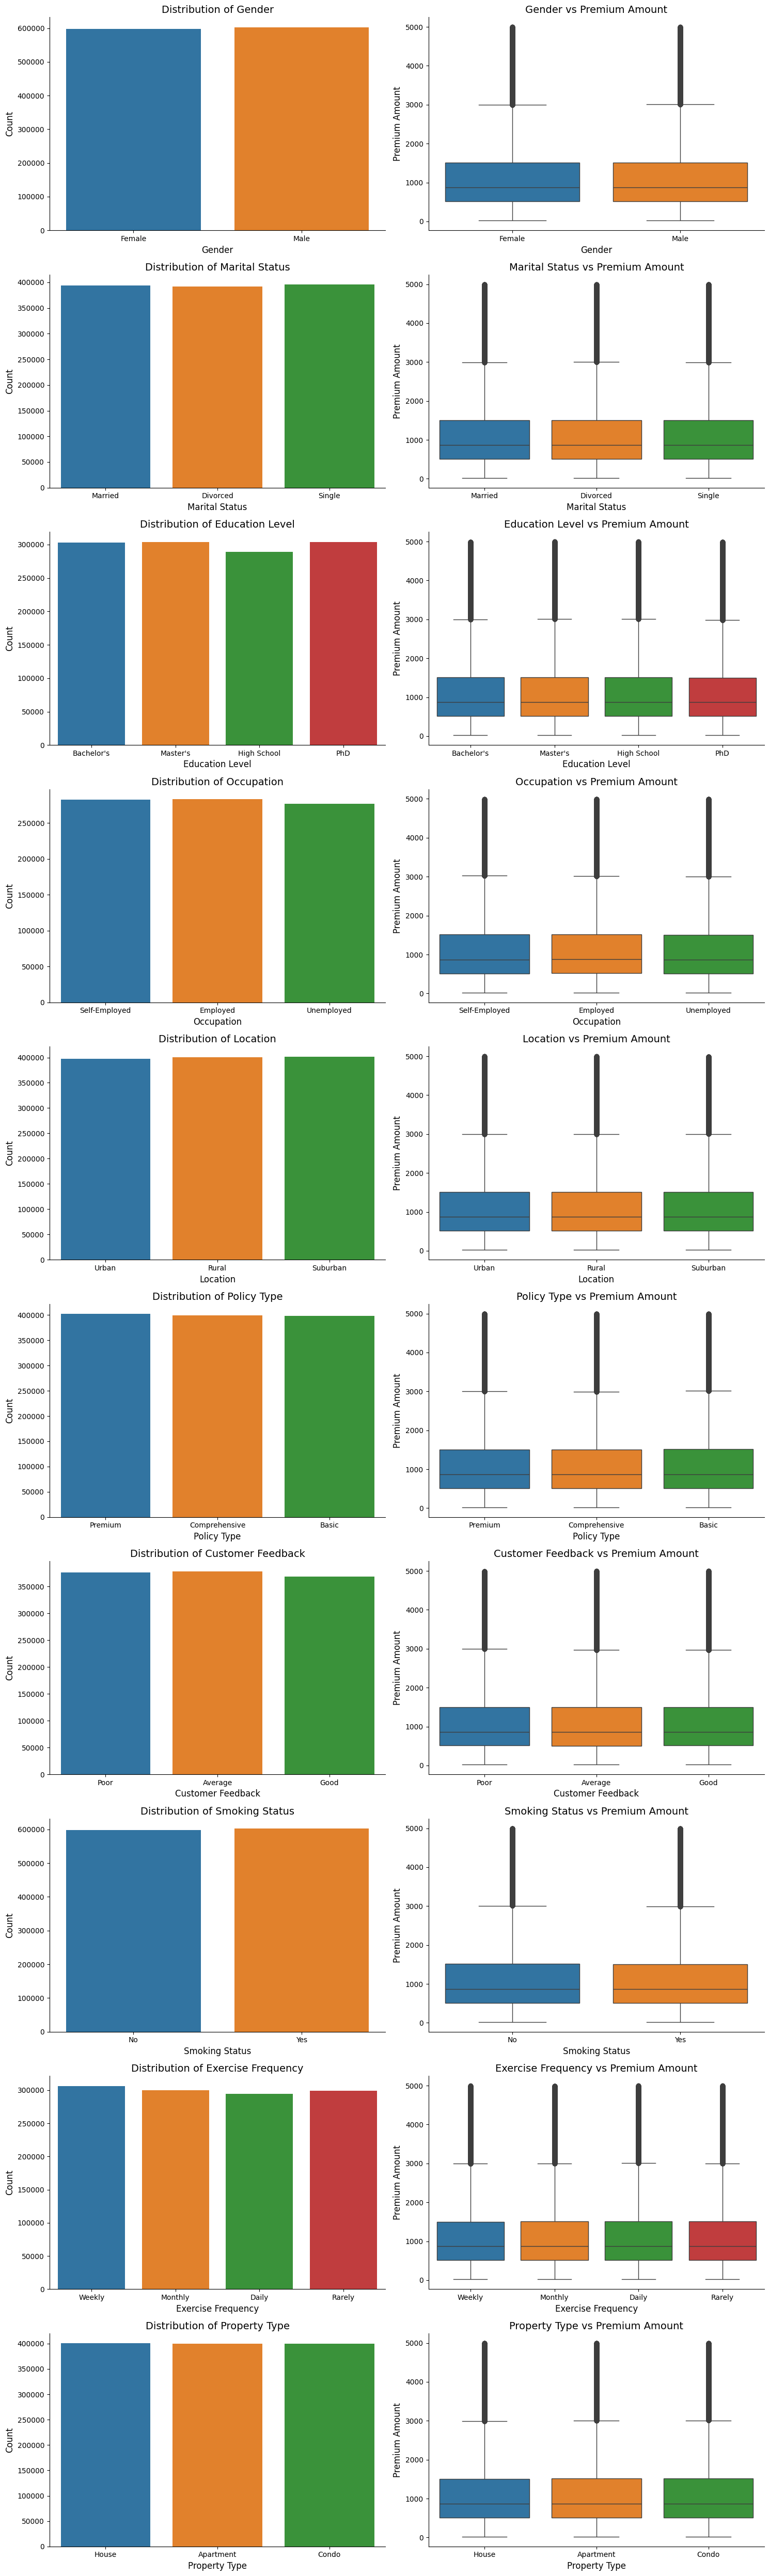

In [19]:
# Categorical columns

# Filter the cateogrical columns, excluding 'Policy Start Date'
filtered_columns = [col for col in categorical_columns if col != 'Policy Start Date']

# Create bar plots
fig, axes = plt.subplots(len(filtered_columns), 2, figsize=(15, 5 * len(filtered_columns)))

for i, column in enumerate(filtered_columns):
    # Barplot on the left side
    sns.countplot(data=df_train, x=column, ax=axes[i, 0], palette='tab10')
    axes[i, 0].set_title(f'Distribution of {column}', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    sns.despine(ax=axes[i, 0])

    # Boxplot on the right side
    sns.boxplot(data=df_train, x=column, y=target_column, ax=axes[i, 1], palette='tab10')
    axes[i, 1].set_title(f'{column} vs {target_column}', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=12)
    axes[i, 1].set_ylabel(target_column, fontsize=12)
    sns.despine(ax=axes[i, 1])

plt.tight_layout()  # Global graph adjustment
plt.show()

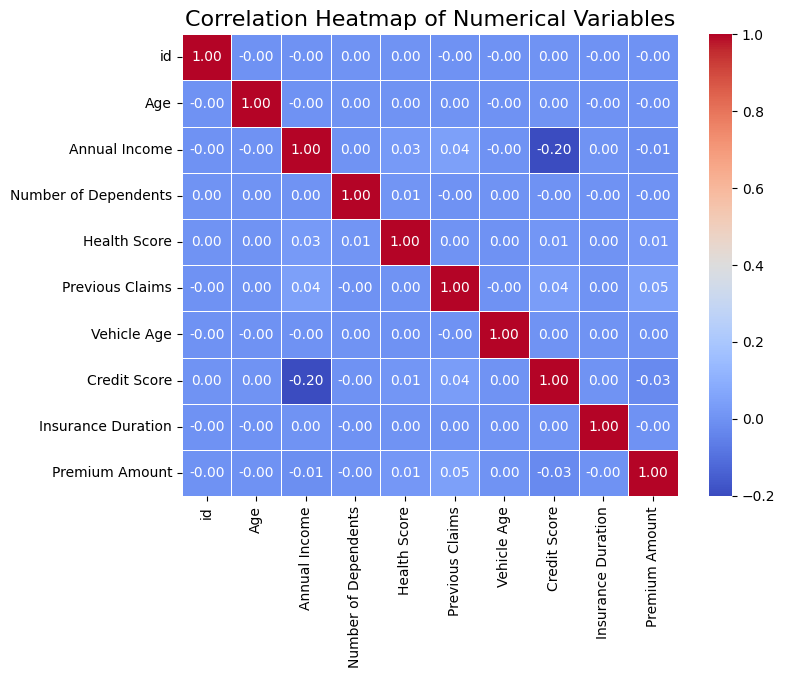

In [23]:
# Correlation matrix
correlation_matrix = df_train[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

# Feature Engineering

In [ ]:
# # Create a column of 'Policy Start Date Year'

# # Assuming 'Policy Start Date' column exists and is in datetime format
# df_train['Policy Start Year'] = pd.to_datetime(df_train['Policy Start Date']).dt.year
# df_train['Policy Start Month'] = pd.to_datetime(df_train['Policy Start Date']).dt.month
# # df_train['Policy Start Week'] = pd.to_datetime(df_train['Policy Start Date']).dt.isocalendar().week #####
# df_train['Policy Start Day'] = pd.to_datetime(df_train['Policy Start Date']).dt.day

# df_test['Policy Start Year'] = pd.to_datetime(df_test['Policy Start Date']).dt.year
# df_test['Policy Start Month'] = pd.to_datetime(df_test['Policy Start Date']).dt.month
# # df_test['Policy Start Week'] = pd.to_datetime(df_test['Policy Start Date']).dt.isocalendar().week #####
# df_test['Policy Start Day'] = pd.to_datetime(df_test['Policy Start Date']).dt.day

# #
# # df_train_original['Policy Start Year'] = pd.to_datetime(df_train_original['Policy Start Date']).dt.year
# # df_train_original['Policy Start Month'] = pd.to_datetime(df_train_original['Policy Start Date']).dt.month
# # df_train_original['Policy Start Day'] = pd.to_datetime(df_train_original['Policy Start Date']).dt.day

In [ ]:
# # 3

# import numpy as np

# # df_train['Policy Start Year'] = pd.to_datetime(df_train['Policy Start Date']).dt.year
# # df_test['Policy Start Year'] = pd.to_datetime(df_test['Policy Start Date']).dt.year

# # Convert Start Month to cyclical features
# df_train['Policy Start Month Sin'] = np.sin(2 * np.pi * df_train['Policy Start Month'] / 12)
# df_train['Policy Start Month Cos'] = np.cos(2 * np.pi * df_train['Policy Start Month'] / 12)

# df_test['Policy Start Month Sin'] = np.sin(2 * np.pi * df_test['Policy Start Month'] / 12)
# df_test['Policy Start Month Cos'] = np.cos(2 * np.pi * df_test['Policy Start Month'] / 12)

# # Convert Start Day to cyclical features (assuming days of the month go up to 31)
# df_train['Policy Start Day Sin'] = np.sin(2 * np.pi * df_train['Policy Start Day'] / 31)
# df_train['Policy Start Day Cos'] = np.cos(2 * np.pi * df_train['Policy Start Day'] / 31)

# df_test['Policy Start Day Sin'] = np.sin(2 * np.pi * df_test['Policy Start Day'] / 31)
# df_test['Policy Start Day Cos'] = np.cos(2 * np.pi * df_test['Policy Start Day'] / 31)


In [ ]:
# # Create a column for cateogrical Health Score Cat ###
# df_train['Health Score Cat'] = df_train['Health Score'].astype('category')

# df_test['Health Score Cat'] = df_test['Health Score'].astype('category')

# # df_train_original['Health Score Cat'] = df_train_original['Health Score'].astype('category')

In [ ]:
# # Drop 'policy start date'

# # Drop the 'Policy Start Date' column from both training and testing datasets
# df_train = df_train.drop(['id', 'Policy Start Date'], axis=1)
# df_test = df_test.drop(['id', 'Policy Start Date'], axis=1)

# # df_train_original = df_train_original.drop(['Policy Start Date'], axis=1)

In [32]:
def transform_feature(df):
  # Date
  # Convert date from object to datetime datatype
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

  df['Policy Start Year'] = df['Policy Start Date'].dt.year
  df['Policy Start Month'] = df['Policy Start Date'].dt.month
  df['Policy Start Day'] = df['Policy Start Date'].dt.day
  df['Policy Start Month Sin'] = np.sin(2 * np.pi * df['Policy Start Month'] / 12)
  df['Policy Start Month Cos'] = np.cos(2 * np.pi * df['Policy Start Month'] / 12)
  df['Policy Start Day Sin'] = np.sin(2 * np.pi * df['Policy Start Day'] / 31)
  df['Policy Start Day Cos'] = np.cos(2 * np.pi * df['Policy Start Day'] / 31)

  # Create a categorical version of some numerical features
  df['Health Score Cat'] = df['Health Score'].astype('category')

  df['Annual Income Cat'] = df['Annual Income'].astype('category') #####
  df['Credit Score Cat'] = df['Credit Score'].astype('category')
  df['Previous Claims Cat'] = df['Previous Claims'].astype('category')
  df['Insurance Duration Cat'] = df['Insurance Duration'].astype('category')
  # df['Number of Dependents Cat'] = df['Number of Dependents'].astype('category')
  df['Age Cat'] = df['Age'].astype('category')
  # df['Vehicle Age Cat'] = df['Vehicle Age'].astype('category')

  # Feature Engineer
  df['Income_x_Claims'] = df['Annual Income'] * df['Previous Claims']

  df.drop(['id', 'Policy Start Date'], axis=1, inplace=True)

  return df

df_train = transform_feature(df_train)
df_test = transform_feature(df_test)

In [33]:
# Fill in NaN values as 'no_entry' for object type

for col in df_train.columns:
    if df_train[col].dtype == 'object': #or df_train[col].dtype == 'category':
        df_train[col] = df_train[col].fillna('no_entry')

for col in df_test.columns:
    if df_test[col].dtype == 'object': #or df_test[col].dtype == 'category':
        df_test[col] = df_test[col].fillna('no_entry')

# for col in df_train_original.columns:
#     if df_train_original[col].dtype == 'object': #or df_train_original[col].dtype == 'category':
#         df_train_original[col] = df_train_original[col].fillna('no_entry')

In [34]:
print(df_train.isnull().sum(), '\n')
print(df_train.dtypes, '\n')

print(df_test.isnull().sum(), '\n')
print(df_test.dtypes)

Age                        18705
Gender                         0
Annual Income              44949
Marital Status                 0
Number of Dependents      109672
Education Level                0
Occupation                     0
Health Score               74076
Location                       0
Policy Type                    0
Previous Claims           364029
Vehicle Age                    6
Credit Score              137882
Insurance Duration             1
Customer Feedback              0
Smoking Status                 0
Exercise Frequency             0
Property Type                  0
Premium Amount                 0
Policy Start Year              0
Policy Start Month             0
Policy Start Day               0
Policy Start Month Sin         0
Policy Start Month Cos         0
Policy Start Day Sin           0
Policy Start Day Cos           0
Health Score Cat           74076
Annual Income Cat          44949
Credit Score Cat          137882
Previous Claims Cat       364029
Insurance 

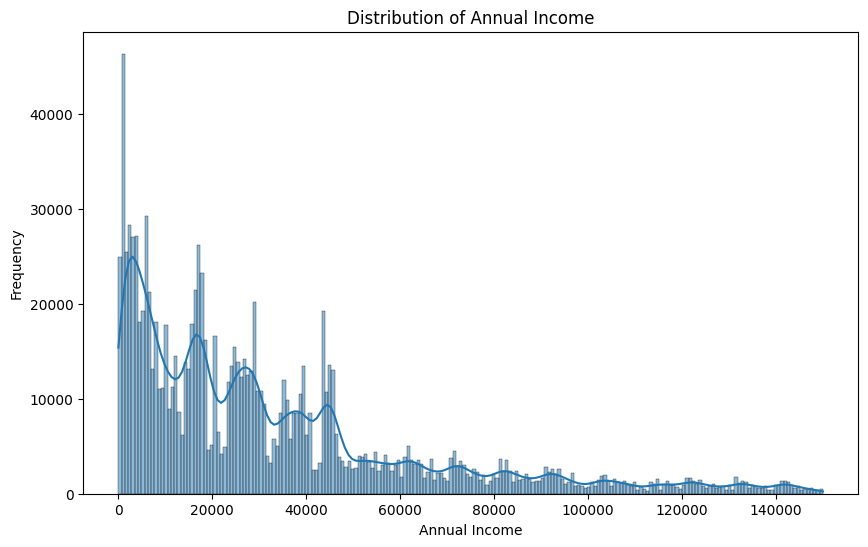

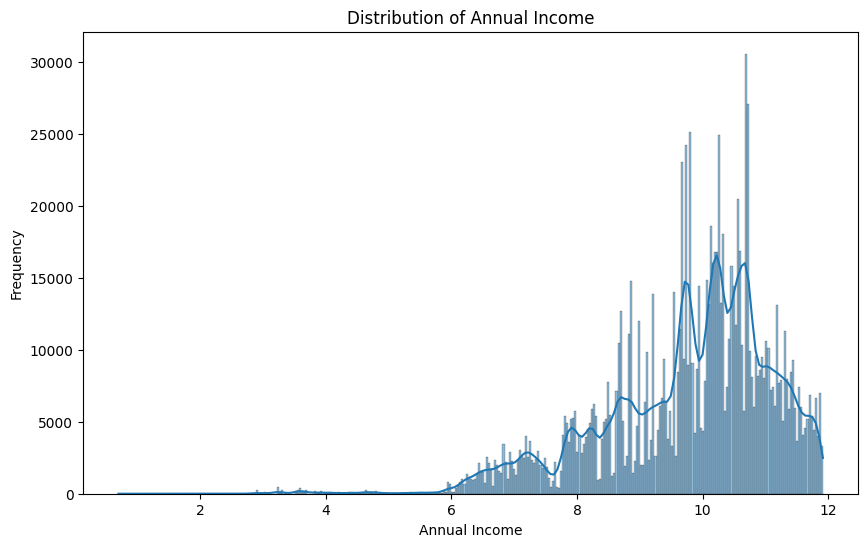

In [55]:
# Plot the distribution of target variable: 'Annual Income'

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_train['Annual Income']), kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Relatively right skewed / tailed

# Reasons for transforming the target (y) for training model is:
# (1.) Since CatBoost only natively support optimizing the loss RMSE, we manually transform to log(y), so that we are directly optimizing for our
# evaluated metric RMSLE
# (2.) Since the original target (y) is quite right skewed, log transformation will help to stabilize variance and reduce the influence of extreme outliers.

# Model:
# CatBoost Regressor

In [28]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [29]:
!pip install shap

In [ ]:
# df_train_copy = df_train.copy()
# df_test_copy = df_test.copy()

In [ ]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='box-cox') # box-cox, yeo-johnson
# df_train_copy['Transformed_Annual_Income'] = pt.fit_transform(df_train_copy[['Annual Income']])
# df_test_copy['Transformed_Annual_Income'] = pt.transform(df_test_copy[['Annual Income']])

# df_train_copy['Transformed_Annual_Income Cat)'] = df_train_copy['Transformed_Annual_Income'].astype('category')
# df_test_copy['Transformed_Annual_Income Cat)'] = df_test_copy['Transformed_Annual_Income'].astype('category')

In [ ]:
# # For testing
# df_train_copy['log(Annual Income)'] = np.log(df_train_copy['Annual Income'])
# df_test_copy['log(Annual Income)'] = np.log(df_test_copy['Annual Income'])

# df_train_copy['log(Annual Income Cat)'] = df_train_copy['log(Annual Income)'].astype('category')
# df_test_copy['log(Annual Income Cat)'] = df_test_copy['log(Annual Income)'].astype('category')

In [ ]:
# df_train_copy['Annual Income Cat'] = df_train_copy['Annual Income'].astype('category') #####
# df_train_copy['Credit Score Cat'] = df_train_copy['Credit Score'].astype('category')
# df_train_copy['Previous Claims Cat'] = df_train_copy['Previous Claims'].astype('category')
# df_train_copy['Insurance Duration Cat'] = df_train_copy['Insurance Duration'].astype('category')
# # df_train_copy['Number of Dependents Cat'] = df_train_copy['Number of Dependents'].astype('category')
# df_train_copy['Age Cat'] = df_train_copy['Age'].astype('category')
# # df_train_copy['Vehicle Age Cat'] = df_train_copy['Vehicle Age'].astype('category')


# df_test_copy['Annual Income Cat'] = df_test_copy['Annual Income'].astype('category') #####
# df_test_copy['Credit Score Cat'] = df_test_copy['Credit Score'].astype('category')
# df_test_copy['Previous Claims Cat'] = df_test_copy['Previous Claims'].astype('category')
# df_test_copy['Insurance Duration Cat'] = df_test_copy['Insurance Duration'].astype('category')
# # df_test_copy['Number of Dependents Cat'] = df_test_copy['Number of Dependents'].astype('category')
# df_test_copy['Age Cat'] = df_test_copy['Age'].astype('category')
# # df_test_copy['Vehicle Age Cat'] = df_test_copy['Vehicle Age'].astype('category')

In [ ]:
# # FE 1
# # df_train_copy['Claims_to_Income'] = df_train_copy['Previous Claims'] / (df_train_copy['Annual Income']) #+1
# # df_test_copy['Claims_to_Income'] = df_test_copy['Previous Claims'] / (df_test_copy['Annual Income']) #+1

# # df_train_copy['Claims_to_Income'] = df_train_copy['Annual Income'] / (df_train_copy['Previous Claims']) #+1
# # df_test_copy['Claims_to_Income'] = df_test_copy['Annual Income'] / (df_test_copy['Previous Claims']) #+1

# # FE 2
# df_train_copy['Income_x_Claims'] = df_train_copy['Annual Income'] * df_train_copy['Previous Claims']
# df_test_copy['Income_x_Claims'] = df_test_copy['Annual Income'] * df_test_copy['Previous Claims']

# # FE 3 + FE 2
# # df_train_copy['Income_x_VehicleAge'] = df_train_copy['Annual Income'] * df_train_copy['Vehicle Age']
# # df_test_copy['Income_x_VehicleAge'] = df_test_copy['Annual Income'] * df_test_copy['Vehicle Age']

# # FE 4 + FE 2
# # df_train_copy['HealthScore_x_Age'] = df_train_copy['Health Score'] * df_train_copy['Age']
# # df_test_copy['HealthScore_x_Age'] = df_test_copy['Health Score'] * df_test_copy['Age']

# # FE 5 + FE 2
# # df_train_copy['Income_per_Dependent'] = df_train_copy['Annual Income'] / df_train_copy['Number of Dependents']
# # df_test_copy['Income_per_Dependent'] = df_test_copy['Annual Income'] / df_test_copy['Number of Dependents']

# # FE 6 + FE 2
# # df_train_copy['Credit_x_Claims'] = df_train_copy['Credit Score'] * df_train_copy['Previous Claims']
# # df_test_copy['Credit_x_Claims'] = df_test_copy['Credit Score'] * df_test_copy['Previous Claims']

# # FE 7 + FE 2
# # df_train_copy['Claims_/_Duration'] = df_train_copy['Previous Claims'] / df_train_copy['Insurance Duration']
# # df_test_copy['Claims_/_Duration'] = df_test_copy['Previous Claims'] / df_test_copy['Insurance Duration']

# # FE 8 + FE 2
# # df_train_copy['Health vs Claims'] = df_train_copy['Health Score'] / df_train_copy['Previous Claims']
# # df_test_copy['Health vs Claims'] = df_test_copy['Health Score'] / df_test_copy['Previous Claims']

# df_train_copy

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0        19.0  Female        10049.0        Married                   1.0   
1        39.0  Female        31678.0       Divorced                   3.0   
2        23.0    Male        25602.0       Divorced                   3.0   
3        21.0    Male       141855.0        Married                   2.0   
4        21.0    Male        39651.0         Single                   1.0   
...       ...     ...            ...            ...                   ...   
1199995  36.0  Female        27316.0        Married                   0.0   
1199996  54.0    Male        35786.0       Divorced                   NaN   
1199997  19.0    Male        51884.0       Divorced                   0.0   
1199998  55.0    Male            NaN         Single                   1.0   
1199999  21.0  Female            NaN       Divorced                   0.0   

        Education Level     Occupation  Health Score  Location    Policy Type  \
0            Bachelor's  Self-Employed     22.598761     Urban        Premium   
1              Master's            NaN     15.569731     Rural  Comprehensive   
2           High School  Self-Employed     47.177549  Suburban        Premium   
3            Bachelor's            NaN     10.938144     Rural          Basic   
4            Bachelor's  Self-Employed     20.376094     Rural        Premium   
...                 ...            ...           ...       ...            ...   
1199995        Master's     Unemployed     13.772907     Urban        Premium   
1199996        Master's  Self-Employed     11.483482     Rural  Comprehensive   
1199997        Master's            NaN     14.724469  Suburban          Basic   
1199998             PhD            NaN     18.547381  Suburban        Premium   
1199999             PhD            NaN     10.125323     Rural        Premium   

         ...  Policy Start Month Cos  Policy Start Day Sin  \
0        ...            1.000000e+00             -0.998717   
1        ...           -1.000000e+00              0.651372   
2        ...           -1.836970e-16             -0.201299   
3        ...           -1.000000e+00              0.651372   
4        ...            1.000000e+00              0.201299   
...      ...                     ...                   ...   
1199995  ...           -8.660254e-01              0.571268   
1199996  ...           -1.836970e-16              0.897805   
1199997  ...           -8.660254e-01             -0.937752   
1199998  ...           -1.836970e-16             -0.651372   
1199999  ...           -5.000000e-01             -0.848644   

         Policy Start Day Cos  Health Score Cat Annual Income Cat  \
0                   -0.050649         22.598761           10049.0   
1                   -0.758758         15.569731           31678.0   
2                    0.979530         47.177549           25602.0   
3                   -0.758758         10.938144          141855.0   
4                    0.979530         20.376094           39651.0   
...                       ...               ...               ...   
1199995              0.820763         13.772907           27316.0   
1199996             -0.440394         11.483482           35786.0   
1199997              0.347305         14.724469           51884.0   
1199998             -0.758758         18.547381               NaN   
1199999              0.528964         10.125323               NaN   

        Credit Score Cat Previous Claims Cat Insurance Duration Cat  Age Cat  \
0                  372.0                 2.0                    5.0     19.0   
1                  694.0                 1.0                    2.0     39.0   
2                    NaN                 1.0                    3.0     23.0   
3                  367.0                 1.0                    1.0     21.0   
4                  598.0                 0.0                    4.0     21.0   
...                  ...                 ...              

In [ ]:
# # For testing: Drop 'Annual Income'

# df_train_copy = df_train_copy.drop(['Annual Income'], axis=1)
# df_test_copy = df_test_copy.drop(['Annual Income'], axis=1)

In [ ]:
# # Convert object columns to category

# # Assuming df_train_copy and df_test_copy are defined as in the previous code

# object_cols = df_train_copy.select_dtypes(include=['object']).columns
# for col in object_cols:
#     df_train_copy[col] = df_train_copy[col].astype('category')
#     df_test_copy[col] = df_test_copy[col].astype('category')

In [ ]:
# for col in df_train_copy.columns:
#     if df_train_copy[col].dtype == 'object': #or df_train[col].dtype == 'category':
#         df_train_copy[col] = df_train_copy[col].fillna('no_entry')

# for col in df_test_copy.columns:
#     if df_test_copy[col].dtype == 'object': #or df_test[col].dtype == 'category':
#         df_test_copy[col] = df_test_copy[col].fillna('no_entry')

In [ ]:
# # prompt: Drop:
# # 27         Education Level     0.007256
# # 28             Policy Type     0.005168
# # 29      Exercise Frequency     0.005137
# # 30                Location     0.003126
# # 31           Property Type     0.002504

# # Drop specified columns
# columns_to_drop = ['Education Level', 'Policy Type', 'Exercise Frequency', 'Location', 'Property Type']
# df_train_copy = df_train_copy.drop(columns=columns_to_drop, errors='ignore')
# df_test_copy = df_test_copy.drop(columns=columns_to_drop, errors='ignore')

In [39]:
for i in df_train.columns:
  if df_train[i].dtype in ['object', 'category']:
    print(i)

Gender
Marital Status
Education Level
Occupation
Location
Policy Type
Customer Feedback
Smoking Status
Exercise Frequency
Property Type
Health Score Cat
Annual Income Cat
Credit Score Cat
Previous Claims Cat
Insurance Duration Cat
Age Cat


In [47]:
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.values
categorical_features

array(['Gender', 'Marital Status', 'Education Level', 'Occupation',
       'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Health Score Cat',
       'Annual Income Cat', 'Credit Score Cat', 'Previous Claims Cat',
       'Insurance Duration Cat', 'Age Cat'], dtype=object)

In [41]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
# Use Kfold with CatBoost Regressor

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold


# Separate features and target variable
X = df_train_copy.drop('Premium Amount', axis=1)
y = df_train_copy['Premium Amount']
y_log = np.log1p(y) # log_e(y+1)
# y_log = np.log(y) # log_e(y)

X_test = df_test_copy

# Identify categorical features
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.values

# categorical_features = [
#     'Gender',
#     'Marital Status',
#     'Education Level',
#     'Occupation',
#     'Location',
#     'Policy Type',
#     'Customer Feedback',
#     'Smoking Status',
#     'Exercise Frequency',
#     'Property Type',
#     'Health Score Cat',
#     'Annual Income Cat',
#     #'log(Annual Income Cat)',
#     #'Transformed_Annual_Income Cat)',
#     'Credit Score Cat',
#     'Previous Claims Cat',
#     'Insurance Duration Cat',
#     # 'Number of Dependents Cat'
#     'Age Cat',
#     # 'Vehicle Age Cat'
#     #'Policy Start Year', #
#     #'Policy Start Month', #
#     # 'Policy Start Day' #

#     # 'Policy Start Month Sin',
#     # 'Policy Start Month Cos',
#     # 'Policy Start Day Sin',
#     # 'Policy Start Day Cos'
# ]

# Convert categorical variables to string type
for col in categorical_features:
    X[col] = X[col].astype(str)
    X[col] = X[col].fillna('no_entry')

    X_test[col] = X_test[col].astype(str)
    X_test[col] = X_test[col].fillna('no_entry')


# Number of folds for KFold
n_splits = 5  # Adjust as needed

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

y_cv_prediction = []
y_test_prediction = []
rmsle_scores = []
fold = 0

for train_index, val_index in kf.split(X, y_log):
    fold += 1
    print(f"Fold {fold}/{n_splits}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y_log.iloc[train_index], y_log.iloc[val_index]

    # Initialize and train the CatBoostRegressor for this fold #1000
    model = CatBoostRegressor(bagging_temperature=0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, max_bin=128, random_strength=1, subsample=0.8,
                              loss_function='RMSE', eval_metric='RMSE', random_seed=42, cat_features=categorical_features)

    model.fit(X_train_fold, y_train_fold,
              eval_set=(X_val_fold, y_val_fold),
              verbose=100,
              use_best_model=True)

    # Make predictions and evaluate
    y_pred_log_fold = model.predict(X_val_fold)
    y_pred_fold = np.expm1(y_pred_log_fold)
    y_cv_prediction.append(y_pred_fold) #

    y_val_fold_orig = np.expm1(y_val_fold)

    rmsle_fold = np.sqrt(mean_squared_log_error(y_val_fold_orig, y_pred_fold))
    rmsle_scores.append(rmsle_fold)
    print(f"RMSLE for fold {fold}: {rmsle_fold}")

    # Test
    y_pred_test_log = model.predict(X_test)
    y_pred_test = np.expm1(y_pred_test_log)
    y_test_prediction.append(y_pred_test)

# Average RMSLE across all folds
avg_rmsle = np.mean(rmsle_scores)
std_rmsle = np.std(rmsle_scores)

print(f"\nAverage RMSLE across {n_splits} folds: {avg_rmsle}")
print(f"Standard Deviation of RMSLE: {std_rmsle}")
print(f"Test set prediction: {y_test_prediction}")

Fold 1/5
0:	learn: 1.0894134	test: 1.0900534	best: 1.0900534 (0)	total: 5.9s	remaining: 1h 38m 10s
100:	learn: 1.0376004	test: 1.0342113	best: 1.0342113 (100)	total: 10m 21s	remaining: 1h 32m 13s
200:	learn: 1.0347260	test: 1.0324912	best: 1.0324912 (200)	total: 21m 48s	remaining: 1h 26m 43s
300:	learn: 1.0330259	test: 1.0320934	best: 1.0320934 (300)	total: 33m 20s	remaining: 1h 17m 26s
400:	learn: 1.0313264	test: 1.0317366	best: 1.0317366 (400)	total: 43m 55s	remaining: 1h 5m 37s
500:	learn: 1.0296519	test: 1.0314585	best: 1.0314537 (485)	total: 55m 31s	remaining: 55m 18s
600:	learn: 1.0281029	test: 1.0313615	best: 1.0313534 (585)	total: 1h 6m 36s	remaining: 44m 13s
700:	learn: 1.0266581	test: 1.0311902	best: 1.0311860 (687)	total: 1h 17m 58s	remaining: 33m 15s
800:	learn: 1.0253337	test: 1.0311496	best: 1.0311478 (797)	total: 1h 28m 46s	remaining: 22m 3s
900:	learn: 1.0238958	test: 1.0311161	best: 1.0311057 (880)	total: 1h 40m 34s	remaining: 11m 3s
999:	learn: 1.0225880	test: 1.03112

In [ ]:
y_test_prediction

[array([862.11811512, 916.74183837, 850.74259678, ..., 898.75174099,
        794.48058795, 793.59711454]),
 array([848.51461454, 867.5671216 , 849.49901172, ..., 901.77167902,
        798.85253594, 820.8079762 ]),
 array([846.01011136, 915.3306775 , 856.8492422 , ..., 878.40366154,
        827.08246052, 835.01920716]),
 array([861.68101443, 904.86913983, 853.17911019, ..., 904.24334281,
        705.05542997, 752.9668692 ]),
 array([801.72759864, 894.00733183, 846.04461931, ..., 898.06591298,
        806.45568216, 842.68133602])]

In [ ]:
len(y_test_prediction[0])

800000

In [ ]:
# Stack the arrays row-wise (vertically)
stacked = np.vstack(y_test_prediction)

# Calculate the mean along the vertical axis (row-wise average)
y_pred_test_avg = np.mean(stacked, axis=0)

# Output the result
print(y_pred_test_avg)

[844.01029082 899.70322183 851.26291604 ... 896.24726747 786.38533931
 809.01450062]


In [ ]:
len(y_pred_test_avg)

800000

In [ ]:
# Generate IDs from 1200000 to 1999999 (matching the length of predictions)
start_id = 1200000
end_id = start_id + len(y_pred_test_avg)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(start_id, end_id),
    'Premium Amount': y_pred_test_avg
})

# Save the predictions to a CSV file
submission_df.to_csv('Insurance_CatBoost_new_12.csv', index=False) # Final submission
print(submission_df.head())

# Submission score:
# 1.03033
# 1.02915 (Current Best)

        id  Premium Amount
0  1200000      844.010291
1  1200001      899.703222
2  1200002      851.262916
3  1200003      778.763747
4  1200004      792.786699


# Using gridsearchCV

In [ ]:
# prompt: Use gridsearch

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error

# Separate features and target variable
X = df_train_copy.drop('Premium Amount', axis=1)
y = df_train_copy['Premium Amount']

y_log = np.log1p(y)
# y_log = np.log(y)

# Identify categorical features
# categorical_features_indices = np.where(X.dtypes != np.float64)[0]
categorical_features_indices = [
    'Gender',
    'Marital Status',
    'Education Level',
    'Occupation',
    'Location',
    'Policy Type',
    'Customer Feedback',
    'Smoking Status',
    'Exercise Frequency',
    'Property Type',
    'Health Score Cat',
    'Annual Income Cat',
    #'log(Annual Income Cat)',
    #'Transformed_Annual_Income Cat)',
    'Credit Score Cat',
    'Previous Claims Cat',
    'Insurance Duration Cat',
    # 'Number of Dependents Cat'
    'Age Cat',
    # 'Vehicle Age Cat'
    #'Policy Start Year', #
    #'Policy Start Month', #
    # 'Policy Start Day' #

    # 'Policy Start Month Sin',
    # 'Policy Start Month Cos',
    # 'Policy Start Day Sin',
    # 'Policy Start Day Cos'
]

for col in categorical_features_indices: #####
    X[col] = X[col].astype(str)  # Convert to string
    X[col] = X[col].fillna('no_entry') #####

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Model
model = CatBoostRegressor(iterations=500,  # Adjust as needed #100, 200, 400
                          learning_rate=0.1, # Adjust as needed
                          depth=10,            # Adjust as needed #10
                          # loss_function='RMSE',
                          loss_function= 'RMSE', # WeightedRMSLEObjective(),
                          eval_metric='RMSE',
                          random_seed=42,
                          cat_features=categorical_features_indices)

# Define the parameter grid to search
# param_grid = {
#     'iterations': [200],  # Adjust the range as needed
#     'learning_rate': [0.01, 0.1, 0.2],
#     'depth': [8, 10, 16]
# }

param_grid = {
    'iterations': [200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [8, 10, 16],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'bagging_temperature': [0, 1, 3],
    'random_strength': [1, 10],
    'max_bin': [128, 254],
    #'bootstrap_type': ['Bayesian', 'Bernoulli']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=10)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100, use_best_model=True, early_stopping_rounds=50)


# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# [CV 2/3; 9/648] START bagging_temperature=0, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.1, max_bin=128, random_strength=1, subsample=0.8

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV 1/3; 1/648] START bagging_temperature=0, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01, max_bin=128, random_strength=1, subsample=0.8
0:	learn: 1.0949785	test: 1.0956565	best: 1.0956565 (0)	total: 4.37s	remaining: 14m 28s
100:	learn: 1.0592528	test: 1.0578936	best: 1.0578936 (100)	total: 6m 37s	remaining: 6m 29s
199:	learn: 1.0501284	test: 1.0477316	best: 1.0477316 (199)	total: 13m 4s	remaining: 0us

bestTest = 1.047731636
bestIteration = 199

[CV 1/3; 1/648] END bagging_temperature=0, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01, max_bin=128, random_strength=1, subsample=0.8;, score=-1.048 total time=13.3min
[CV 2/3; 1/648] START bagging_temperature=0, depth=8, iterations=200, l2_leaf_reg=1, learning_rate=0.01, max_bin=128, random_strength=1, subsample=0.8
0:	learn: 1.0953176	test: 1.0956565	best: 1.0956565 (0)	total: 4.89s	remaining: 16m 12s
100:	learn: 1.0594593	test: 1.0578723	best: 1.057

In [ ]:
from sklearn.metrics import mean_squared_log_error

# Make predictions on the validation set
y_pred_log = best_model.predict(X_val)
y_pred = np.expm1(y_pred_log)
# y_pred = np.exp(y_pred_log)

y_val_cv = np.expm1(y_val)
# y_val_cv = np.exp(y_val)

# Evaluate the model
rmsle = np.sqrt(mean_squared_log_error(y_val_cv, y_pred))
print(f'RMSLE on validation set: {rmsle}')

In [ ]:
from sklearn.metrics import mean_squared_log_error

# Make predictions on the validation set
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
# y_pred = np.exp(y_pred_log)

y_val_cv = np.expm1(y_val)
# y_val_cv = np.exp(y_val)

# Evaluate the model
rmsle = np.sqrt(mean_squared_log_error(y_val_cv, y_pred))
print(f'RMSLE on validation set: {rmsle}')

# Current: 1.0356056177123625
# Fill NaN numeric columns as '-1': 1.0358432043027814
# Fill NaN to categorical variables as well: 1.0358432043027814
# + 'nan_count' column: 1.0357605215641645

# Remove some columns: 1.035810018756098
# + Days Passed: 1.035776894344574

# Current with iterations=225: 1.0313389642119848

# iterations=50:
# Current: 1.0365955491005736
# + seconds since 1970: 1.0365933507003184
# + seconds since 1970 + Days of Week: 1.036624656714124

# + seconds since 1970 + cyclical month + cyclical day: 1.036589487229259 --> (iterations=100: 1.0355745582165254)
# + cyclical month + cyclical day: 1.035502196847094 (iterations=100)
# + cyclical month + cyclical day (as category): 1.0356934546240621

# + cyclical month + cyclical day: 1.0314901220934274
# + cyclical month + cyclical day (Only): 1.0313346388052487

##########
# 1.0358217729564332 (iterations=100)
# (iterations=200) #1.0314901220934274

##########
# iterations=100: 1.035502196847094 --> 1.035502196847094 (Same: Covnert object to category type)
# iterations=300: 1.031178213892751
# iterations=400: 1.0311223853513158

########## iterations=100:
# Current: 1.035502196847094
# Drop: ['Education Level', 'Policy Type', 'Exercise Frequency', 'Location', 'Property Type']: 1.0357 (100) --> 1.031663635276973 (200)
# log(Annual Income) + log(Annual Income Cat): 1.0357548630722022 --> 1.0358106696937324
# Transformed_Annual_Income Cat: 1.0358106800011802 (yeo-johnson), (box-cox) 1.0358106948791994
#

RMSLE on validation set: 1.035502196847094


In [ ]:
# Create a dataframe for y_val_cv and y_pred

import pandas as pd

# Assuming y_val and y_pred are already defined from your previous code

# Create a DataFrame
results_df = pd.DataFrame({'y_val_cv': y_val_cv, 'y_pred': y_pred})

# Now you can work with the results_df DataFrame
results_df

y_val_cv       y_pred
372605     2742.0   887.429959
551204     1347.0  1011.246966
240320     2196.0   801.499622
1047361     684.0   831.617911
555362     1714.0   836.096336
...           ...          ...
458271     1286.0   861.638469
1124744      24.0   626.162442
720454      971.0   808.162708
256458      562.0   949.201775
423212     1484.0   817.090664

[240000 rows x 2 columns]

In [ ]:
# Add the columns of results_df to X_val

X_val_df = pd.concat([X_val, results_df], axis=1)
X_val_df

Age  Gender  Annual Income Marital Status  Number of Dependents  \
372605   52.0  Female         5538.0        Married                   NaN   
551204   60.0  Female        39711.0        Married                   4.0   
240320   58.0  Female         2364.0        Married                   2.0   
1047361  39.0    Male         9094.0       Divorced                   0.0   
555362   47.0    Male        43189.0       Divorced                   NaN   
...       ...     ...            ...            ...                   ...   
458271   46.0    Male        32875.0       Divorced                   1.0   
1124744  39.0    Male        46820.0         Single                   1.0   
720454   18.0  Female        27596.0         Single                   1.0   
256458   30.0    Male       110140.0       Divorced                   0.0   
423212   21.0    Male        39766.0        Married                   3.0   

        Education Level     Occupation  Health Score  Location    Policy Type  \
372605         Master's       Employed      8.093145     Rural          Basic   
551204       Bachelor's       Employed           NaN  Suburban  Comprehensive   
240320       Bachelor's            nan     34.452482     Urban  Comprehensive   
1047361      Bachelor's            nan     26.241661     Rural          Basic   
555362              PhD            nan     26.691921  Suburban  Comprehensive   
...                 ...            ...           ...       ...            ...   
458271       Bachelor's            nan     32.140638     Urban        Premium   
1124744             PhD            nan      6.990761  Suburban  Comprehensive   
720454       Bachelor's  Self-Employed     14.538865     Rural        Premium   
256458       Bachelor's       Employed           NaN     Rural          Basic   
423212              PhD       Employed     24.777833     Rural  Comprehensive   

         ...  Policy Start Day Cos    Health Score Cat  Annual Income Cat  \
372605   ...             -0.440394    8.09314457192605             5538.0   
551204   ...             -0.994869                 nan            39711.0   
240320   ...              0.918958   34.45248164689432             2364.0   
1047361  ...             -0.612106   26.24166085142068             9094.0   
555362   ...              0.820763   26.69192135726308            43189.0   
...      ...                   ...                 ...                ...   
458271   ...             -0.050649   32.14063811058477            32875.0   
1124744  ...              0.528964   6.990761043889993            46820.0   
720454   ...             -0.440394  14.538865396721343            27596.0   
256458   ...             -0.612106                 nan           110140.0   
423212   ...              0.820763  24.777832689555016            39766.0   

         Credit Score Cat Previous Claims Cat Insurance Duration Cat Age Cat  \
372605              497.0                 0.0                    3.0    52.0   
551204              340.0                 0.0                    3.0    60.0   
240320                nan                 2.0                    7.0    58.0   
1047361             761.0                 1.0                    5.0    39.0   
555362              319.0                 1.0                    4.0    47.0   
...                   ...                 ...                    ...     ...   
458271              627.0                 0.0                    6.0    46.0   
1124744             614.0                 2.0                    5.0    39.0   
720454              678.0                 0.0                    3.0    18.0   
256458              524.0                 nan                    6.0    30.0   
423212              572.0                 1.0                    2.0    21.0   

        Income_x_Claims  y_val_cv       y_pred  
372605              0.0    2742.0   887.429959  
551204              0.0    1347.0  1011.246966  
240320           4728.0    2196.0   801.499622  
1047361          9094.0     68

In [ ]:
X_under_pred = X_val_df[X_val_df['y_pred'] <= X_val_df['y_val_cv']] #y_pred <= y_val_cv
X_under_pred

Age  Gender  Annual Income Marital Status  Number of Dependents  \
372605   52.0  Female         5538.0        Married                   NaN   
551204   60.0  Female        39711.0        Married                   4.0   
240320   58.0  Female         2364.0        Married                   2.0   
555362   47.0    Male        43189.0       Divorced                   NaN   
1062538  55.0  Female          569.0       Divorced                   0.0   
...       ...     ...            ...            ...                   ...   
363862   26.0  Female        11986.0        Married                   2.0   
936882   28.0    Male        11894.0        Married                   0.0   
458271   46.0    Male        32875.0       Divorced                   1.0   
720454   18.0  Female        27596.0         Single                   1.0   
423212   21.0    Male        39766.0        Married                   3.0   

        Education Level     Occupation  Health Score  Location    Policy Type  \
372605         Master's       Employed      8.093145     Rural          Basic   
551204       Bachelor's       Employed           NaN  Suburban  Comprehensive   
240320       Bachelor's            nan     34.452482     Urban  Comprehensive   
555362              PhD            nan     26.691921  Suburban  Comprehensive   
1062538        Master's       Employed     23.183100     Urban          Basic   
...                 ...            ...           ...       ...            ...   
363862         Master's  Self-Employed     19.869602     Urban          Basic   
936882       Bachelor's            nan     12.144077     Rural  Comprehensive   
458271       Bachelor's            nan     32.140638     Urban        Premium   
720454       Bachelor's  Self-Employed     14.538865     Rural        Premium   
423212              PhD       Employed     24.777833     Rural  Comprehensive   

         ...  Policy Start Day Cos    Health Score Cat  Annual Income Cat  \
372605   ...             -0.440394    8.09314457192605             5538.0   
551204   ...             -0.994869                 nan            39711.0   
240320   ...              0.918958   34.45248164689432             2364.0   
555362   ...              0.820763   26.69192135726308            43189.0   
1062538  ...             -0.250653   23.18309968012919              569.0   
...      ...                   ...                 ...                ...   
363862   ...              0.979530  19.869602058097463            11986.0   
936882   ...             -0.050649  12.144077185707696            11894.0   
458271   ...             -0.050649   32.14063811058477            32875.0   
720454   ...             -0.440394  14.538865396721343            27596.0   
423212   ...              0.820763  24.777832689555016            39766.0   

         Credit Score Cat Previous Claims Cat Insurance Duration Cat Age Cat  \
372605              497.0                 0.0                    3.0    52.0   
551204              340.0                 0.0                    3.0    60.0   
240320                nan                 2.0                    7.0    58.0   
555362              319.0                 1.0                    4.0    47.0   
1062538             613.0                 1.0                    5.0    55.0   
...                   ...                 ...                    ...     ...   
363862              613.0                 2.0                    2.0    26.0   
936882              582.0                 0.0                    1.0    28.0   
458271              627.0                 0.0                    6.0    46.0   
720454              678.0                 0.0                    3.0    18.0   
423212              572.0                 1.0                    2.0    21.0   

        Income_x_Claims  y_val_cv       y_pred  
372605              0.0    2742.0   887.429959  
551204              0.0    1347.0  1011.246966  
240320           4728.0    2196.0   801.499622  
555362          43189.0    171

In [ ]:
X_over_pred = X_val_df[X_val_df['y_pred'] > X_val_df['y_val_cv']] #y_pred > y_val_cv
X_over_pred

Age  Gender  Annual Income Marital Status  Number of Dependents  \
1047361  39.0    Male         9094.0       Divorced                   0.0   
1021194  22.0    Male         2989.0         Single                   2.0   
475763   56.0  Female         5905.0         Single                   1.0   
533547   33.0  Female        29093.0        Married                   2.0   
324056   41.0  Female         6925.0         Single                   3.0   
...       ...     ...            ...            ...                   ...   
493686   36.0  Female        90906.0        Married                   2.0   
154028   35.0    Male        20234.0         Single                   2.0   
1038802  41.0  Female        17140.0       Divorced                   0.0   
1124744  39.0    Male        46820.0         Single                   1.0   
256458   30.0    Male       110140.0       Divorced                   0.0   

        Education Level     Occupation  Health Score  Location    Policy Type  \
1047361      Bachelor's            nan     26.241661     Rural          Basic   
1021194     High School     Unemployed     25.955222  Suburban        Premium   
475763       Bachelor's       Employed     15.083823     Urban  Comprehensive   
533547              PhD       Employed     23.972112     Rural  Comprehensive   
324056         Master's            nan     47.235714  Suburban        Premium   
...                 ...            ...           ...       ...            ...   
493686       Bachelor's  Self-Employed      9.332522  Suburban  Comprehensive   
154028         Master's  Self-Employed     22.624121     Rural          Basic   
1038802        Master's            nan     31.382289     Urban          Basic   
1124744             PhD            nan      6.990761  Suburban  Comprehensive   
256458       Bachelor's       Employed           NaN     Rural          Basic   

         ...  Policy Start Day Cos    Health Score Cat  Annual Income Cat  \
1047361  ...             -0.612106   26.24166085142068             9094.0   
1021194  ...             -0.874347    25.9552218564723             2989.0   
475763   ...              0.820763  15.083822634040692             5905.0   
533547   ...             -0.994869  23.972111814775328            29093.0   
324056   ...              0.347305   47.23571446708036             6925.0   
...      ...                   ...                 ...                ...   
493686   ...              0.918958    9.33252227252002            90906.0   
154028   ...              0.979530  22.624120700500427            20234.0   
1038802  ...             -0.954139   31.38228875011757            17140.0   
1124744  ...              0.528964   6.990761043889993            46820.0   
256458   ...             -0.612106                 nan           110140.0   

         Credit Score Cat Previous Claims Cat Insurance Duration Cat Age Cat  \
1047361             761.0                 1.0                    5.0    39.0   
1021194             749.0                 nan                    9.0    22.0   
475763              550.0                 nan                    5.0    56.0   
533547                nan                 0.0                    2.0    33.0   
324056              586.0                 nan                    4.0    41.0   
...                   ...                 ...                    ...     ...   
493686              393.0                 0.0                    7.0    36.0   
154028              529.0                 2.0                    8.0    35.0   
1038802             588.0                 1.0                    8.0    41.0   
1124744             614.0                 2.0                    5.0    39.0   
256458              524.0                 nan                    6.0    30.0   

        Income_x_Claims  y_val_cv      y_pred  
1047361          9094.0     684.0  831.617911  
1021194             NaN      38.0  710.422560  
475763              NaN     518.0  865.458167  
533547              0.0      25.0 

# Plot of Shapley values:
* To interpret which features contribute to increasing/decreasing the predicted the target variable value ('num_sold').
* [Shapley documentation](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

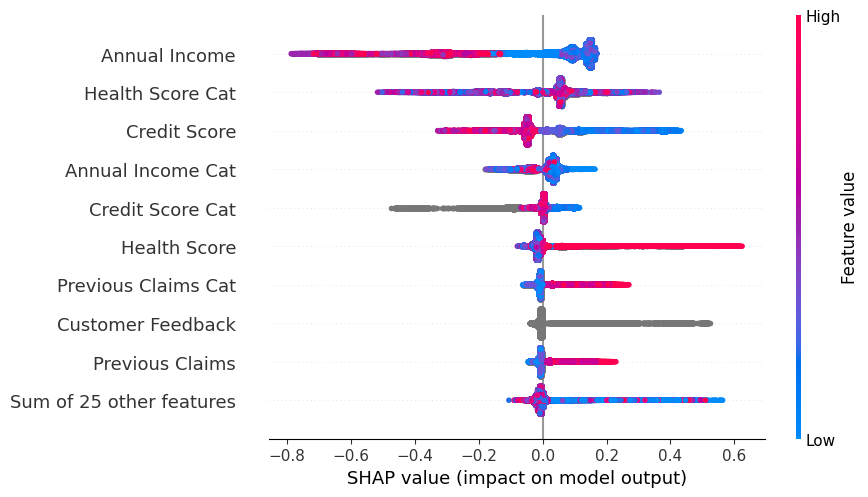

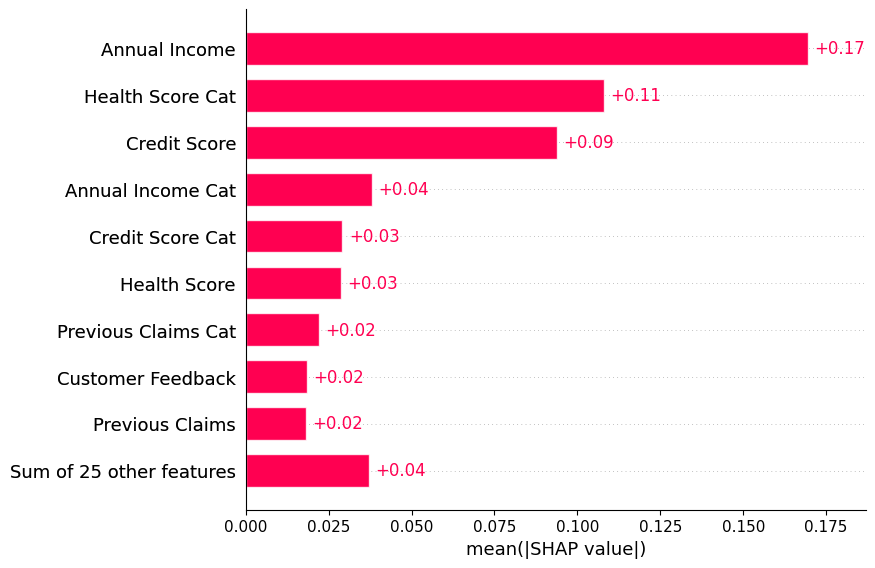

In [ ]:
# Underpredict: y_pred <= y_val_cv (CV set)
# Trying to see which features contribute to underpredicting the target value
# Shapley value plot should be used on the cross validation set to evaluate the model

import shap

# Assuming X_val is your validation data
explainer = shap.Explainer(model)
shap_values = explainer(X_under_pred)

# Visualize the SHAP values
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

# You can also use other SHAP plot types:
# shap.summary_plot(shap_values, X_val)
# shap.dependence_plot("feature_name", shap_values, X_val)

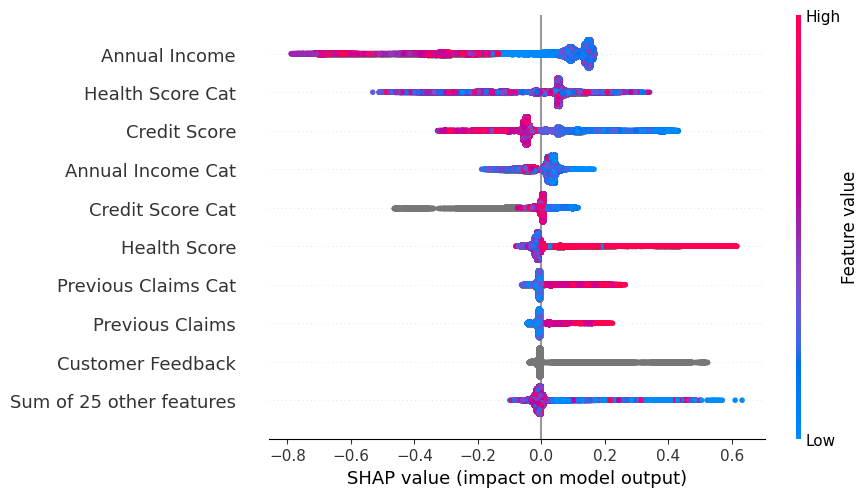

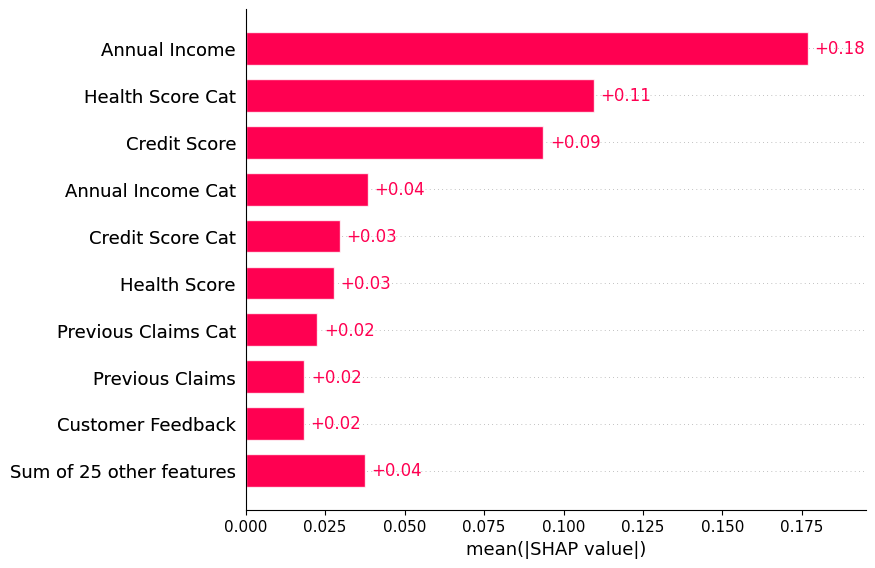

In [ ]:
# Overpredict: y_pred > y_val_cv (CV set)
# # Trying to see which features contribute to overpredicting the target value

import shap

# Assuming X_val is your validation data
explainer = shap.Explainer(model)
shap_values = explainer(X_over_pred)

# Visualize the SHAP values
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

# You can also use other SHAP plot types:
# shap.summary_plot(shap_values, X_val)
# shap.dependence_plot("feature_name", shap_values, X_val)

                Feature Id  Importances
0            Annual Income    34.999765
1             Credit Score    18.126593
2             Health Score     9.064701
3         Health Score Cat     8.270460
4         Credit Score Cat     6.336033
5      Previous Claims Cat     5.369637
6        Customer Feedback     4.293243
7          Previous Claims     3.823554
8        Policy Start Year     3.218923
9        Annual Income Cat     3.078463
10          Marital Status     1.188381
11              Occupation     0.271061
12         Income_x_Claims     0.231591
13    Number of Dependents     0.210329
14                     Age     0.206563
15      Insurance Duration     0.186356
16        Policy Start Day     0.179265
17             Vehicle Age     0.165429
18  Policy Start Month Sin     0.153801
19  Policy Start Month Cos     0.129921
20      Policy Start Month     0.108426
21    Policy Start Day Sin     0.090529
22          Smoking Status     0.080914
23                  Gender     0.076325


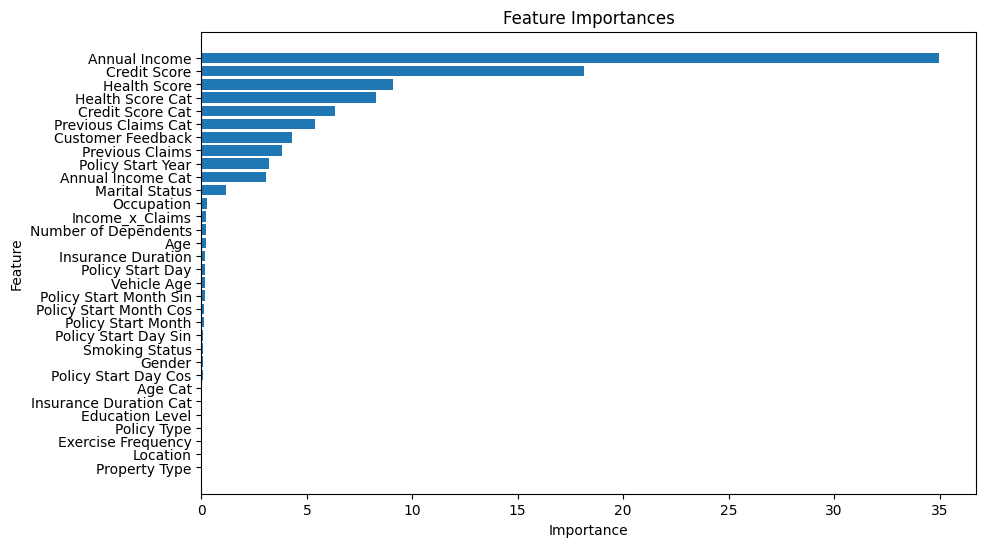

In [ ]:
# Feature importance

# Get feature importances from the trained CatBoost model
feature_importances = model.get_feature_importance(prettified=True)

# Print feature importances
print(feature_importances)

# Bar plot of feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature Id'], feature_importances['Importances'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

# Quantifies how much each feature improves the accuracy of the model when used to split data points during tree building.

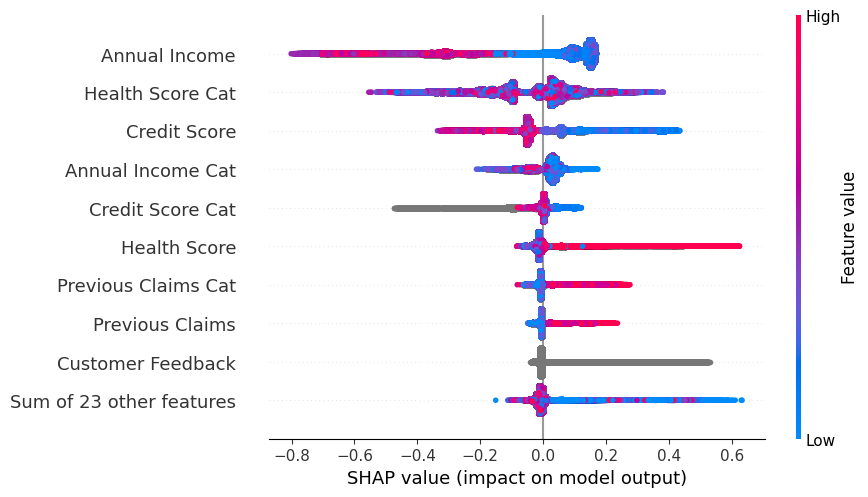

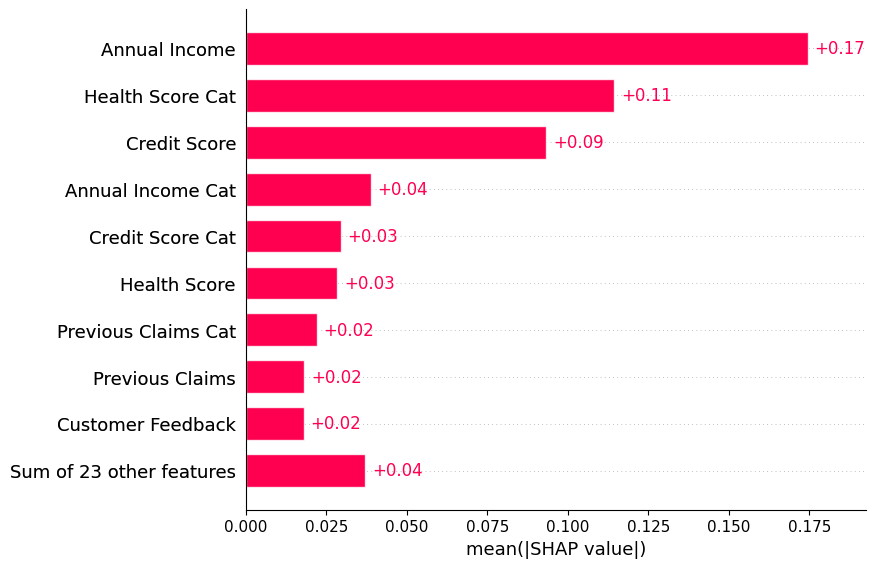

In [ ]:
# On whole predictor dataset (X)
# Trying to see which features contribute to increasing/decreasing the target value

import shap

# Assuming X_val is your validation data
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Visualize the SHAP values
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

# We can also use other SHAP plot types:
# shap.summary_plot(shap_values, X_val)
# shap.dependence_plot("feature_name", shap_values, X_val)

In [ ]:
shap_values.shape

(1200000, 32)

In [ ]:
shap_values

In [ ]:
shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()

shap.plots.force(shap_values[0:1000])

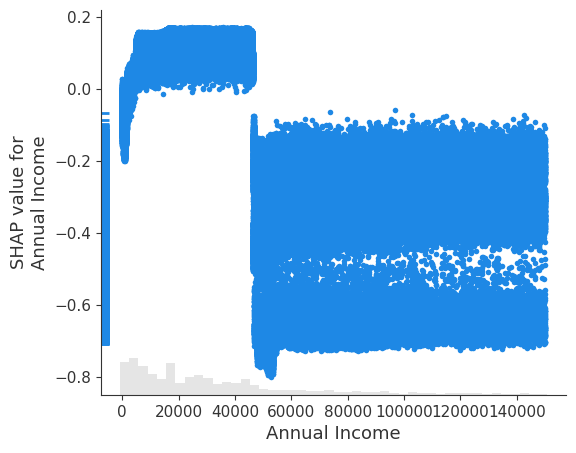

In [ ]:
shap.plots.scatter(shap_values[:, 'Annual Income'])

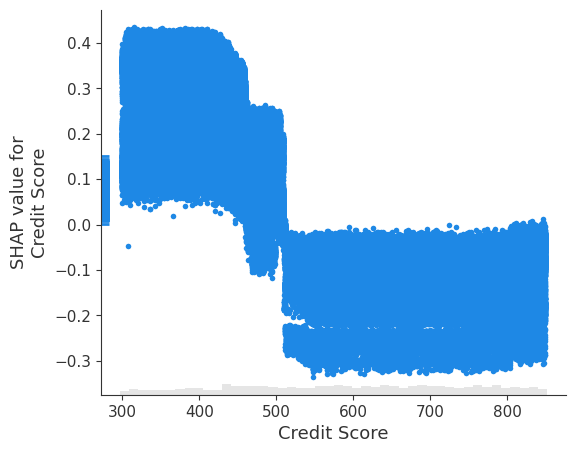

In [ ]:
shap.plots.scatter(shap_values[:, 'Credit Score'])

# Positive SHAP values indicate that the 'Credit Score' feature contributes to increasing the model's prediction for that observation.
# Negative SHAP values indicate that the feature contributes to decreasing the prediction.

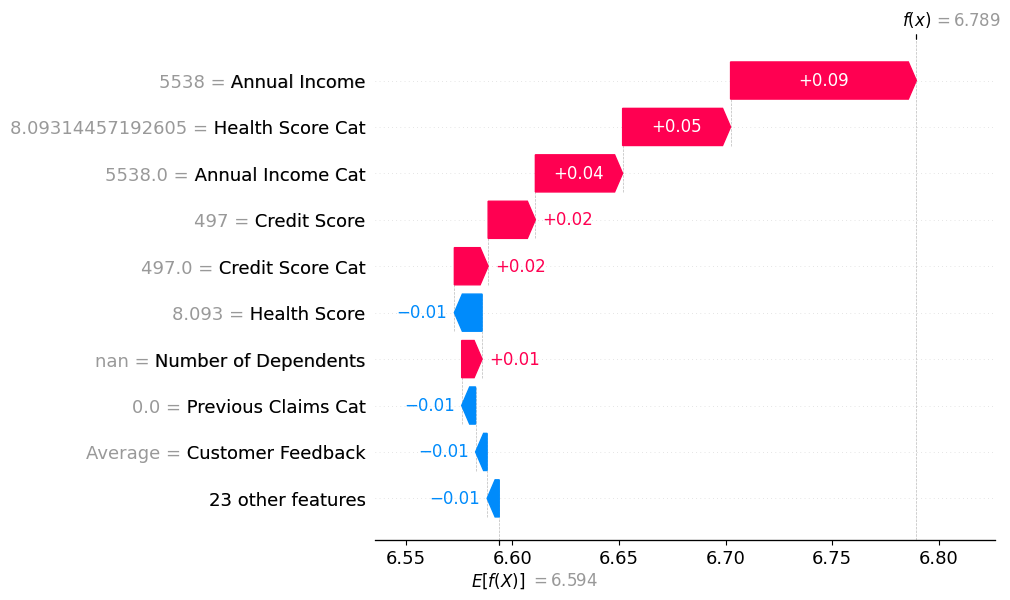

In [ ]:
shap.plots.waterfall(shap_values[372605])
# f(x) = Predicted response: 'Premium Amount'
# E[f(x)] = Average prediction of 'Premium Amount' of all rows

In [ ]:
np.exp(6.789)

888.0250925774716

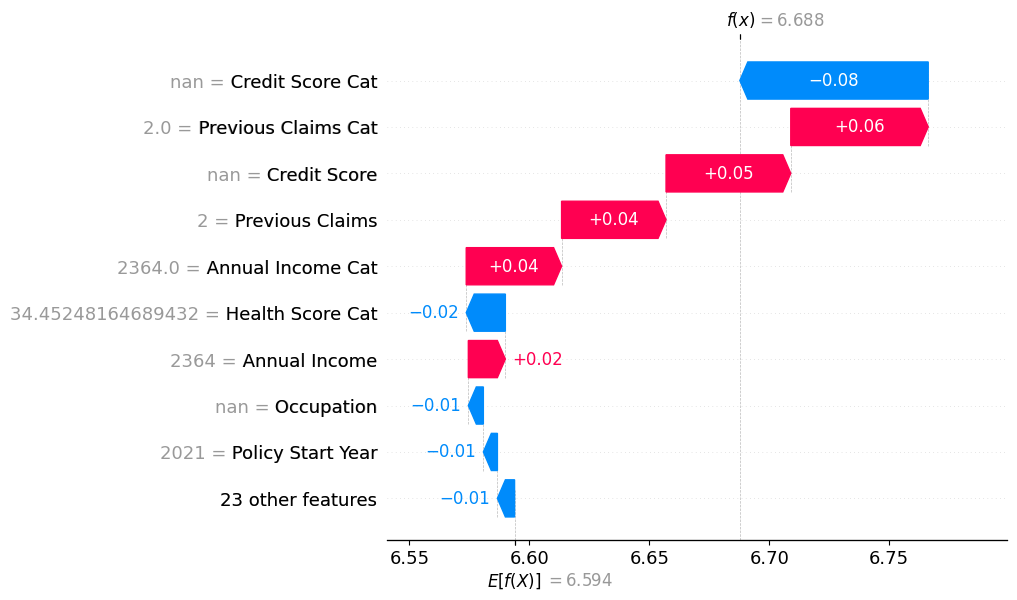

In [ ]:
shap.plots.waterfall(shap_values[240320])

In [ ]:
np.exp(6.688)

802.7152152123042

In [ ]:
results_df

y_val_cv       y_pred
372605     2742.0   887.429959
551204     1347.0  1011.246966
240320     2196.0   801.499622
1047361     684.0   831.617911
555362     1714.0   836.096336
...           ...          ...
458271     1286.0   861.638469
1124744      24.0   626.162442
720454      971.0   808.162708
256458      562.0   949.201775
423212     1484.0   817.090664

[240000 rows x 2 columns]

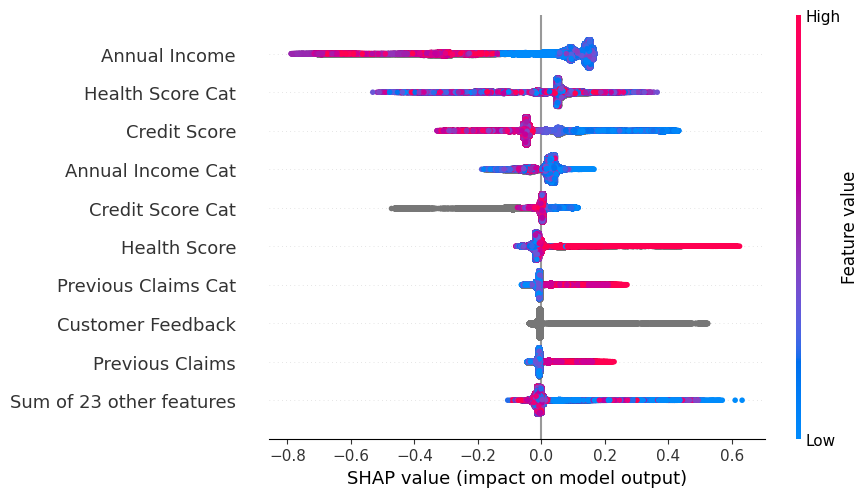

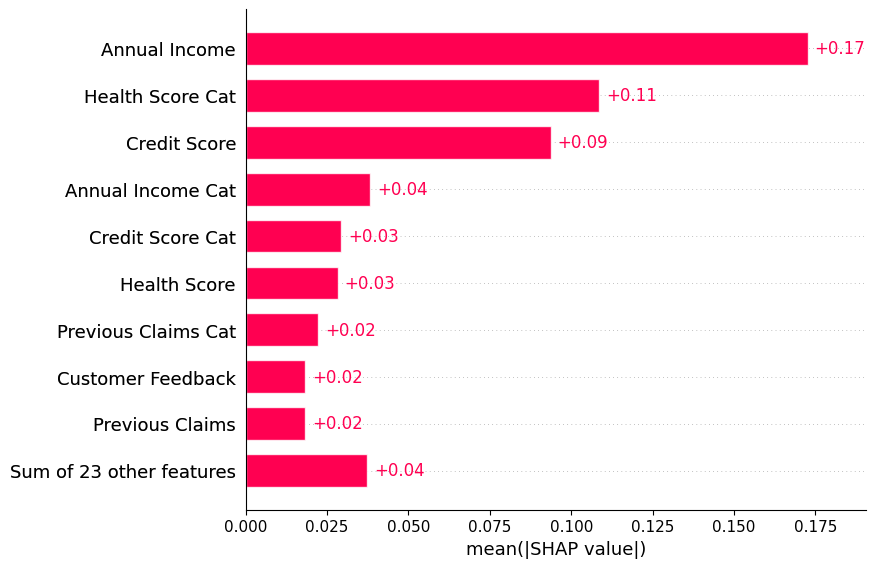

In [ ]:
# On cross validation set (CV set)

import shap

# Assuming X_val is your validation data
explainer = shap.Explainer(model)
shap_values = explainer(X_val)

# Visualize the SHAP values
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

# You can also use other SHAP plot types:
# shap.summary_plot(shap_values, X_val)
# shap.dependence_plot("feature_name", shap_values, X_val)

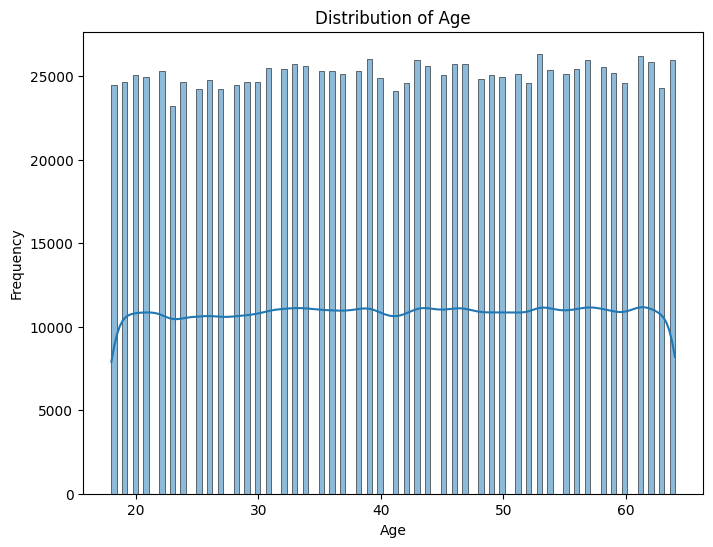

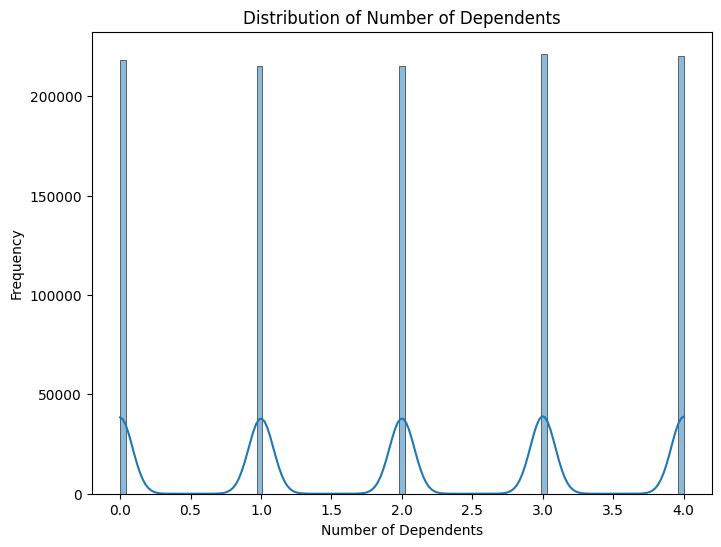

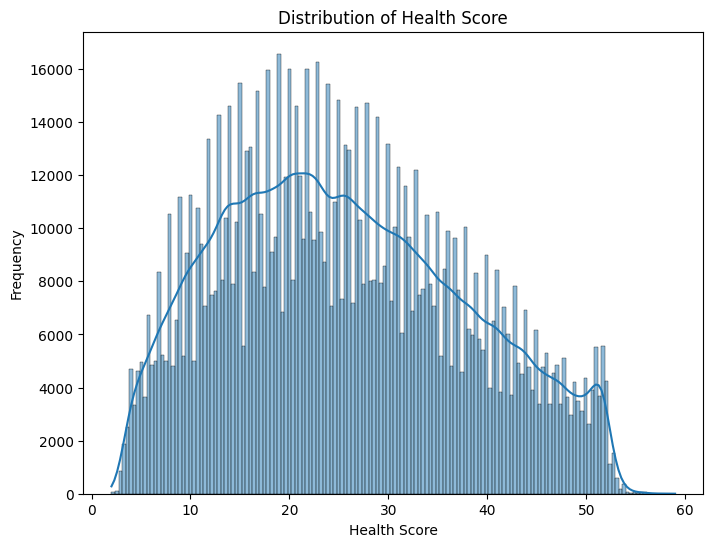

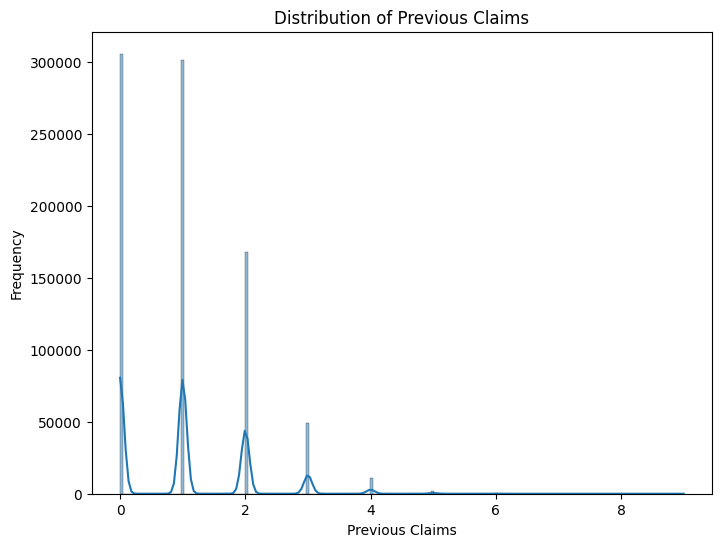

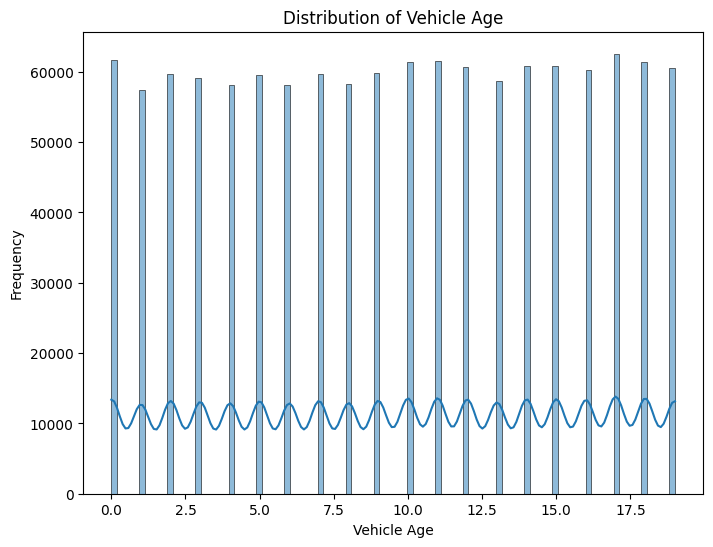

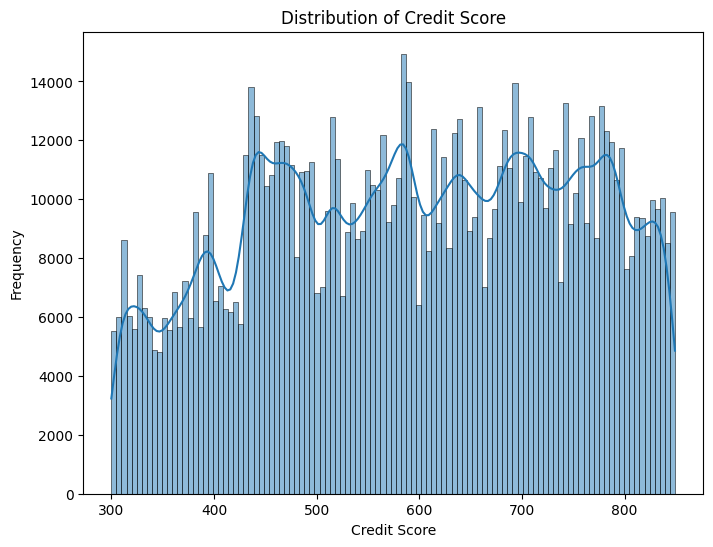

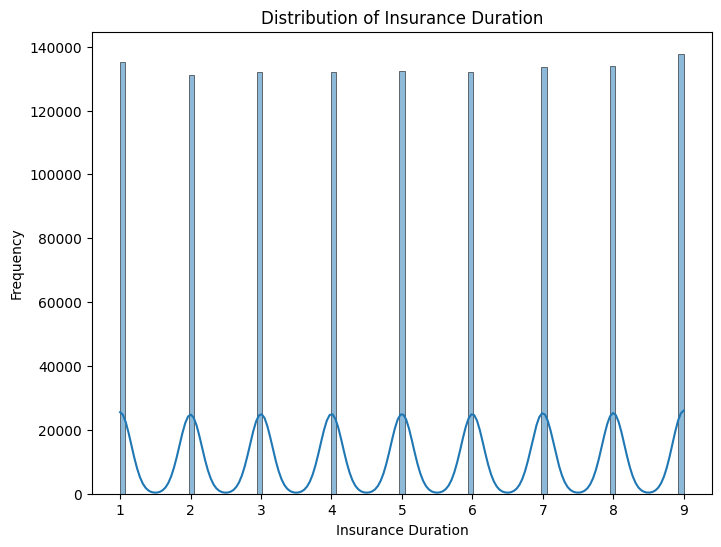

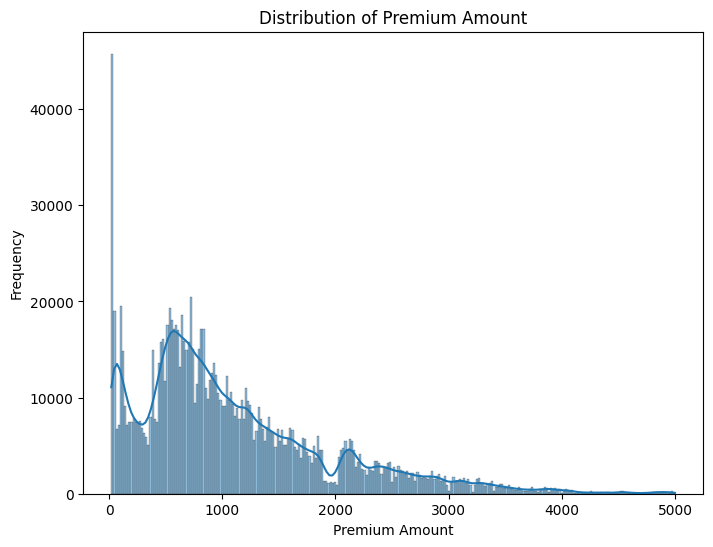

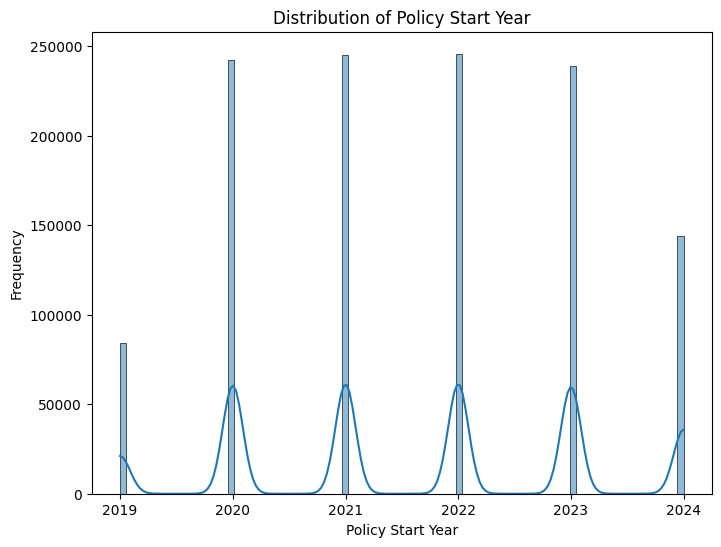

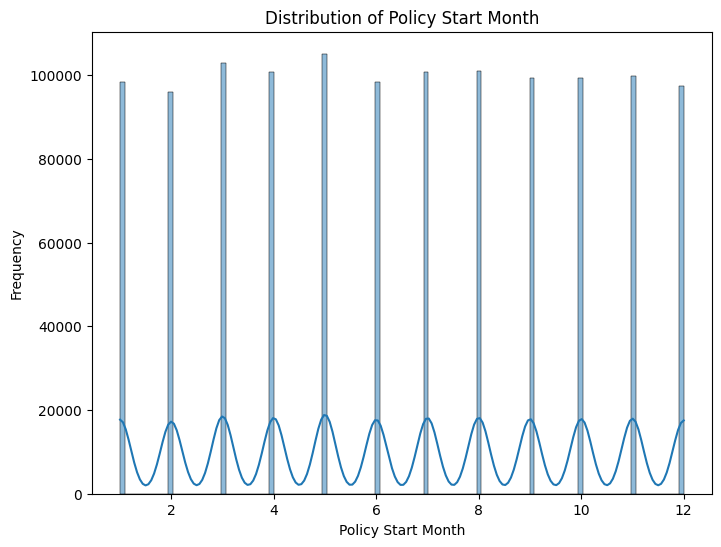

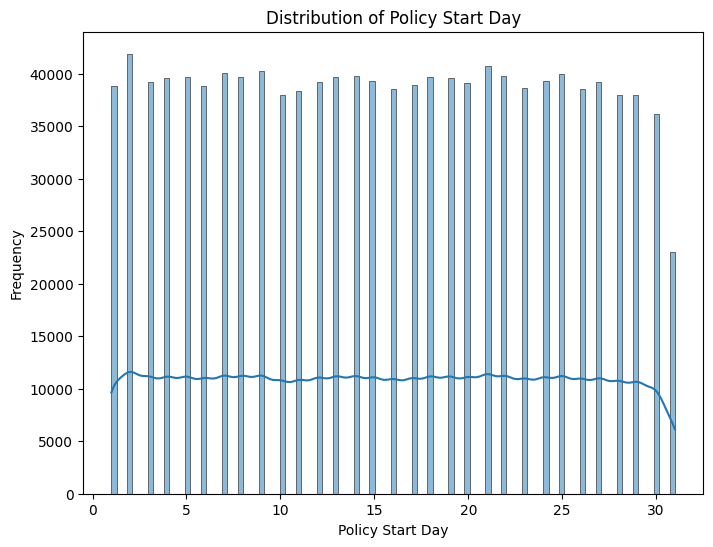

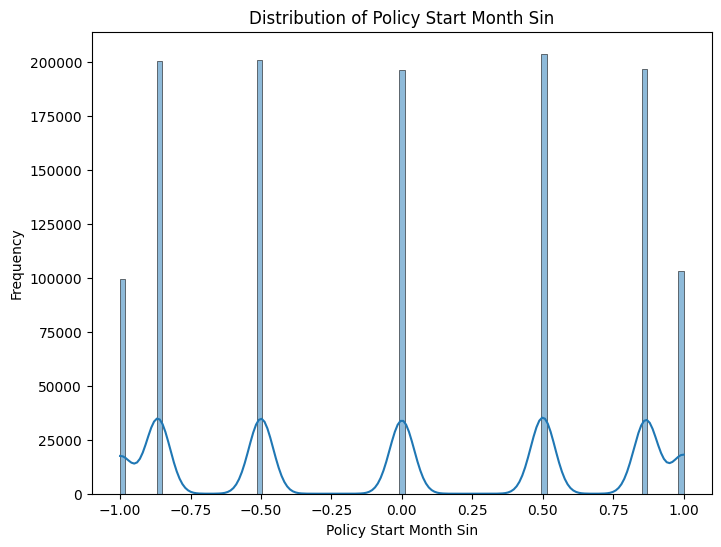

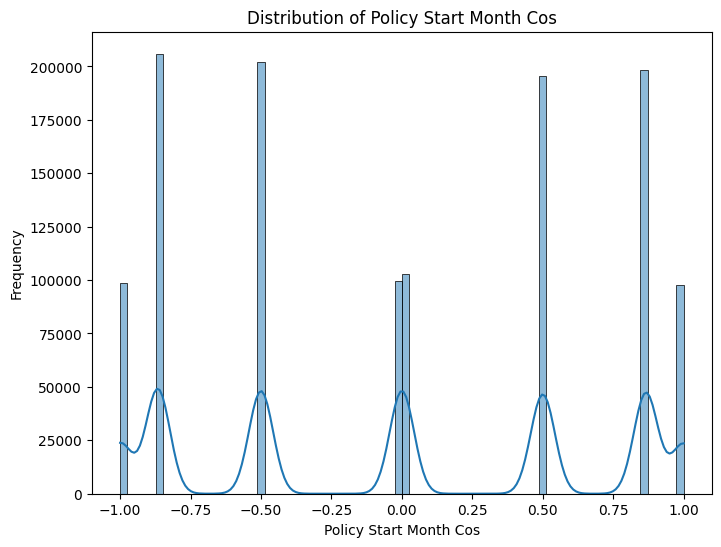

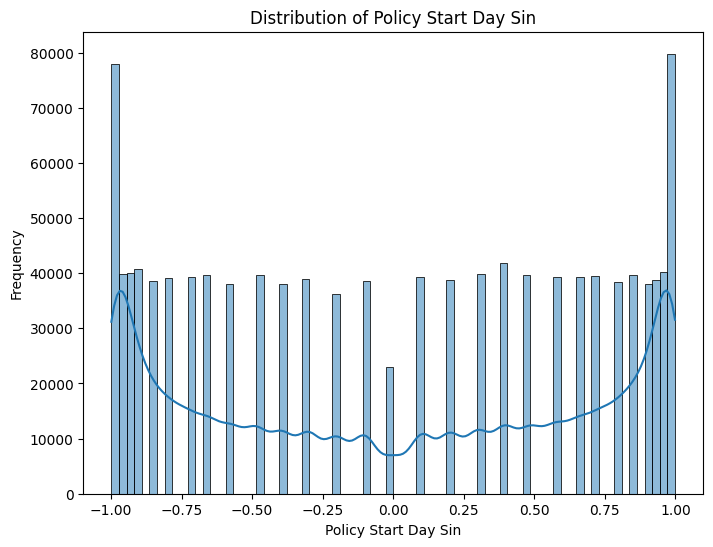

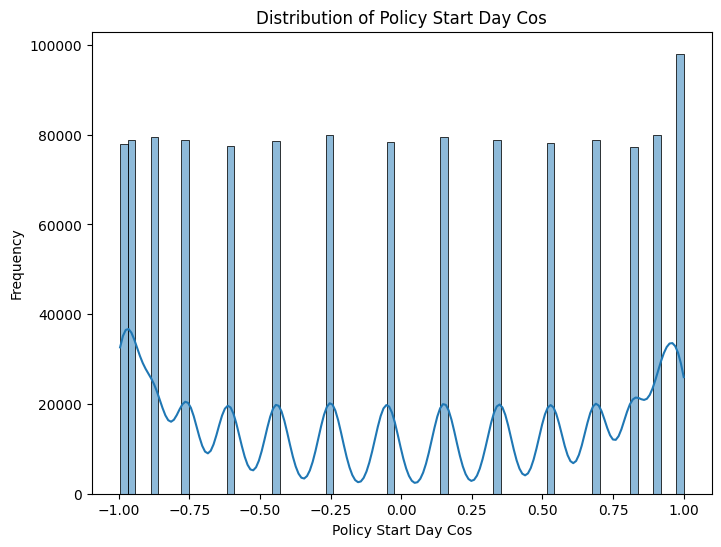

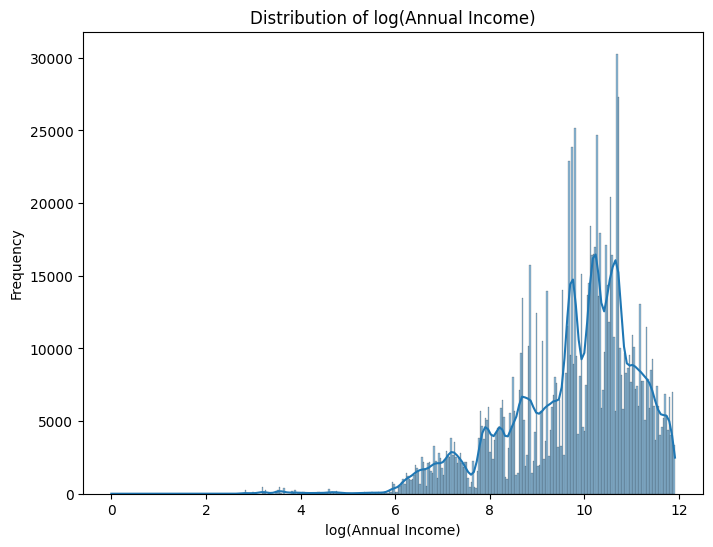

In [ ]:
# Plot distribution of each numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_train_copy is your DataFrame
numerical_features = df_train_copy.select_dtypes(include=['number']).columns

for col in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df_train_copy[col], kde=True)  # Use kde=True to show density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

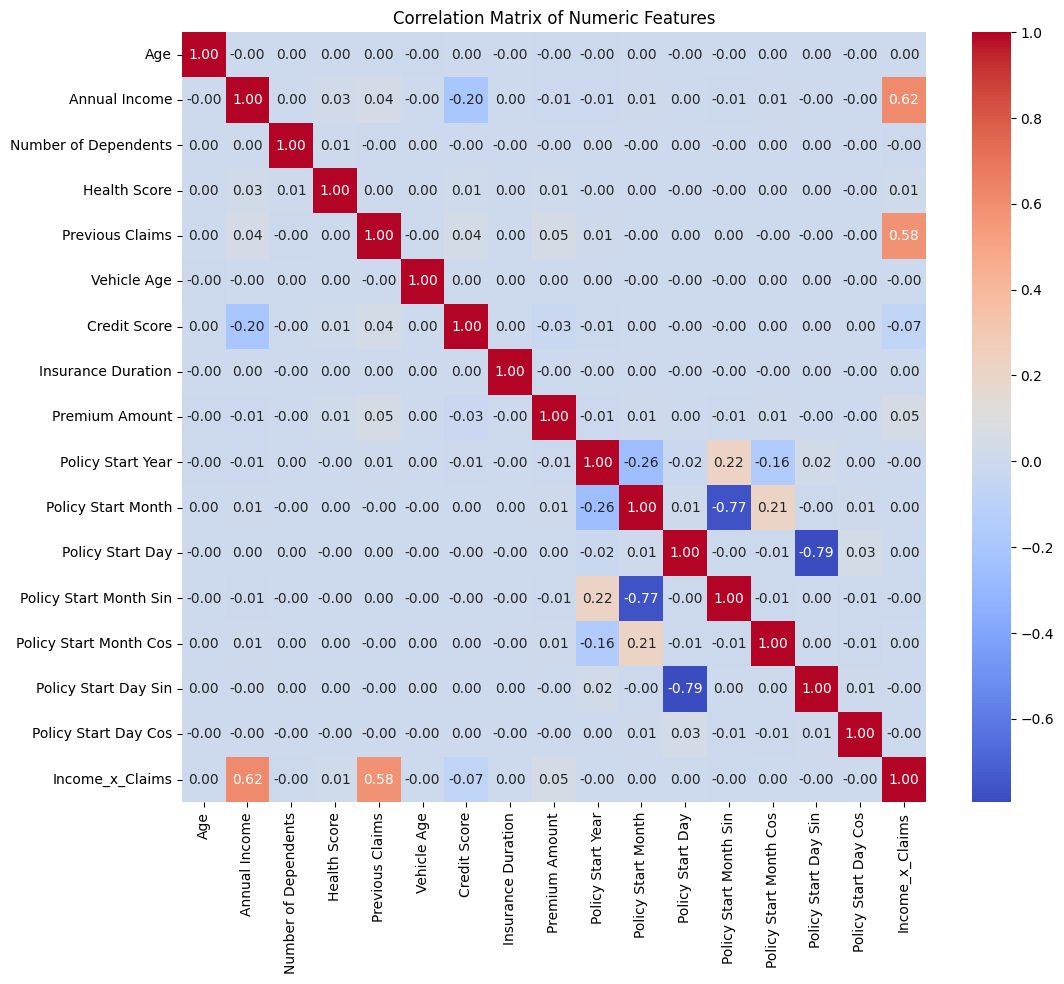

In [ ]:
# Plot correlation matrix using sns.heatmap for all numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train_copy is your DataFrame
numeric_cols = df_train_copy.select_dtypes(include=np.number).columns
correlation_matrix = df_train_copy[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
X_test = df_test_copy

for col in categorical_features_indices: #####
    X_test[col] = X_test[col].astype(str)  # Convert to string
    X_test[col] = X_test[col].fillna('no_entry') #####

y_pred_test_log = model.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)
y_pred_test

array([829.61839484, 940.92215006, 840.34556448, ..., 886.75531243,
       819.30325862, 797.03267825])

In [ ]:
# Generate IDs from 1200000 to 1999999 (matching the length of predictions)
start_id = 1200000
end_id = start_id + len(y_pred_test)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': range(start_id, end_id),
    'Premium Amount': y_pred_test
})

# Save the predictions to a CSV file
submission_df.to_csv('Insurance_CatBoost_new_11.csv', index=False)
print(submission_df.head())

# Submission score: 1.03033 (Current Best)

        id  Premium Amount
0  1200000      829.618395
1  1200001      940.922150
2  1200002      840.345564
3  1200003      782.479699
4  1200004      758.516868
